# WEEK-1 TASK :-
1 :  Data collection <br>
2 :  Data processing

DATA COLLECTED FROM &nbsp;&nbsp;&nbsp; : <a href="https://archive.ics.uci.edu/dataset/360/air+quality">UCI repo/documentation</a>

importing depndencies

In [541]:
import pandas as pd
import numpy as np
import joblib

In [542]:
air_quality_data=pd.read_csv("./AirQualityUCI.csv")

In [543]:
air_quality_data.head()

Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;
10/03/2004;18.00.00;2            6;1360;150;11                 9;1046;166;1056;113;1692;1268;13 6;48 9;0                                                7578;;                                                                          
10/03/2004;19.00.00;2;1292;112;9 4;955;103;1174;92;1559;972;13 3;47                             7;0  7255;;                                                NaN                                                                          
10/03/2004;20.00.00;2            2;1402;88;9                   0;939;131;1140;114;1555;1074;11  9;54 0;0                                                7502;;                                                                          
10/03/2004;21.00.00;2            2;1376;80;9                   2;948;172;1092;122;1584;1203;11  0;60 0;0                                                7867;;                                                                          
10/03/2004;22.00.00;1            6;1272;51;6                   5;836;131;1205;116;1490;1110;11  2;59 6;0                                                7888;;

since data is not well formatted so formatting it

In [544]:
air_quality_data=pd.read_csv("./AirQualityUCI.csv",sep=";")
air_quality_data.head() #printing firts 5 rows

Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6       1360.0     150.0     11,9         1046.0   
1  10/03/2004  19.00.00      2       1292.0     112.0      9,4          955.0   
2  10/03/2004  20.00.00    2,2       1402.0      88.0      9,0          939.0   
3  10/03/2004  21.00.00    2,2       1376.0      80.0      9,2          948.0   
4  10/03/2004  22.00.00    1,6       1272.0      51.0      6,5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9   
1    103.0        1174.0     92.0        1559.0        972.0  13,3  47,7   
2    131.0        1140.0    114.0        1555.0       1074.0  11,9  54,0   
3    172.0        1092.0    122.0        1584.0       1203.0  11,0  60,0   
4    131.0        1205.0    116.0        1490.0       1110.0  11,2  59,6   

       AH  Unnamed: 15  Unnamed: 16  
0  0,7578          NaN          NaN  
1  0,7255          NaN          NaN  
2  0,7502          NaN          NaN  
3  0,7867          NaN          NaN  
4  0,7888          NaN          NaN

still we have , in place of . so need to fix it

In [545]:
air_quality_data=pd.read_csv("./AirQualityUCI.csv",sep=";",decimal=",")
air_quality_data.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  Unnamed: 15  Unnamed: 16  
0  13.6  48.9  0.7578          NaN          NaN  
1  13.3  47.7  0.7255          NaN          NaN  
2  11.9  54.0  0.7502          NaN          NaN  
3  11.0  60.0  0.7867          NaN          NaN  
4  11.2  59.6  0.7888          NaN          NaN

now the data is well tabularized

but we can clearly see last two column in the above table is NaN means they are missing values so we have to remove this as well

In [546]:
#removing last two columns from datset
air_quality_data=air_quality_data.iloc[:,:-2]

In [547]:
air_quality_data.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  
0  13.6  48.9  0.7578  
1  13.3  47.7  0.7255  
2  11.9  54.0  0.7502  
3  11.0  60.0  0.7867  
4  11.2  59.6  0.7888

In [548]:
air_quality_data.tail()

Date Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
9466  NaN  NaN     NaN          NaN       NaN       NaN            NaN   
9467  NaN  NaN     NaN          NaN       NaN       NaN            NaN   
9468  NaN  NaN     NaN          NaN       NaN       NaN            NaN   
9469  NaN  NaN     NaN          NaN       NaN       NaN            NaN   
9470  NaN  NaN     NaN          NaN       NaN       NaN            NaN   

      NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)   T  RH  AH  
9466      NaN           NaN      NaN           NaN          NaN NaN NaN NaN  
9467      NaN           NaN      NaN           NaN          NaN NaN NaN NaN  
9468      NaN           NaN      NaN           NaN          NaN NaN NaN NaN  
9469      NaN           NaN      NaN           NaN          NaN NaN NaN NaN  
9470      NaN           NaN      NaN           NaN          NaN NaN NaN NaN

from above table it is clear that we also have some rows with NaN values so we have to remove those values

in UCI DOCUMENTATION IT IS MENTIONED THAT ONLY 9356 ROWS ARE VALID REST ARE NaN

In [549]:
air_quality_data.loc[[9356]]

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
9356  04/04/2005  14.00.00     2.2       1071.0    -200.0      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
9356         1047.0    265.0         654.0    168.0        1129.0   

      PT08.S5(O3)     T    RH      AH  
9356        816.0  28.5  13.1  0.5028

In [550]:
air_quality_data.loc[[9357]]

Date Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
9357  NaN  NaN     NaN          NaN       NaN       NaN            NaN   

      NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)   T  RH  AH  
9357      NaN           NaN      NaN           NaN          NaN NaN NaN NaN

as after printing 9356 and 9357 row we can see NaN data is start from row no 9357 so remove all rows from row no 9357

In [551]:
air_quality_data=air_quality_data.head(9357)
air_quality_data.tail()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
9352  04/04/2005  10.00.00     3.1       1314.0    -200.0      13.5   
9353  04/04/2005  11.00.00     2.4       1163.0    -200.0      11.4   
9354  04/04/2005  12.00.00     2.4       1142.0    -200.0      12.4   
9355  04/04/2005  13.00.00     2.1       1003.0    -200.0       9.5   
9356  04/04/2005  14.00.00     2.2       1071.0    -200.0      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
9352         1101.0    472.0         539.0    190.0        1374.0   
9353         1027.0    353.0         604.0    179.0        1264.0   
9354         1063.0    293.0         603.0    175.0        1241.0   
9355          961.0    235.0         702.0    156.0        1041.0   
9356         1047.0    265.0         654.0    168.0        1129.0   

      PT08.S5(O3)     T    RH      AH  
9352       1729.0  21.9  29.3  0.7568  
9353       1269.0  24.3  23.7  0.7119  
9354       1092.0  26.9  18.3  0.6406  
9355        770.0  28.3  13.5  0.5139  
9356        816.0  28.5  13.1  0.5028

In [552]:
air_quality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [553]:
air_quality_data.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

from above to tables it is clear that we hane no null/NaN values in dataset BUT IN UCI REPO/DOCUMENTATION IT IS MENTIONED THAT SOME MISSING VALUES ARE TAGGED WITH VALUE -200

In [554]:
air_quality_data.tail()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
9352  04/04/2005  10.00.00     3.1       1314.0    -200.0      13.5   
9353  04/04/2005  11.00.00     2.4       1163.0    -200.0      11.4   
9354  04/04/2005  12.00.00     2.4       1142.0    -200.0      12.4   
9355  04/04/2005  13.00.00     2.1       1003.0    -200.0       9.5   
9356  04/04/2005  14.00.00     2.2       1071.0    -200.0      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
9352         1101.0    472.0         539.0    190.0        1374.0   
9353         1027.0    353.0         604.0    179.0        1264.0   
9354         1063.0    293.0         603.0    175.0        1241.0   
9355          961.0    235.0         702.0    156.0        1041.0   
9356         1047.0    265.0         654.0    168.0        1129.0   

      PT08.S5(O3)     T    RH      AH  
9352       1729.0  21.9  29.3  0.7568  
9353       1269.0  24.3  23.7  0.7119  
9354       1092.0  26.9  18.3  0.6406  
9355        770.0  28.3  13.5  0.5139  
9356        816.0  28.5  13.1  0.5028

in NMHC column we can clearly see the -200 values .

In [555]:
#checking how many -200 values in dtaset
air_quality_data.isin([-200]).sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

from above table we can see how many times -200 appears in each column

**HANDLING MISSING VALUES**
- first, converting -200 to NaN values
- second, replace those NaN by mean values of respective columns

In [556]:
# converting -200 to NaN
air_quality_data=air_quality_data.replace(to_replace=-200,value=np.nan)

In [557]:
air_quality_data.isnull().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [558]:
air_quality_data.tail()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
9352  04/04/2005  10.00.00     3.1       1314.0       NaN      13.5   
9353  04/04/2005  11.00.00     2.4       1163.0       NaN      11.4   
9354  04/04/2005  12.00.00     2.4       1142.0       NaN      12.4   
9355  04/04/2005  13.00.00     2.1       1003.0       NaN       9.5   
9356  04/04/2005  14.00.00     2.2       1071.0       NaN      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
9352         1101.0    472.0         539.0    190.0        1374.0   
9353         1027.0    353.0         604.0    179.0        1264.0   
9354         1063.0    293.0         603.0    175.0        1241.0   
9355          961.0    235.0         702.0    156.0        1041.0   
9356         1047.0    265.0         654.0    168.0        1129.0   

      PT08.S5(O3)     T    RH      AH  
9352       1729.0  21.9  29.3  0.7568  
9353       1269.0  24.3  23.7  0.7119  
9354       1092.0  26.9  18.3  0.6406  
9355        770.0  28.3  13.5  0.5139  
9356        816.0  28.5  13.1  0.5028

so now -200 is converted to NaN as shown by abiove table

In [559]:
# now checking mean of each columns
air_quality_data.mean(numeric_only=True) 

CO(GT)              2.152750
PT08.S1(CO)      1099.833166
NMHC(GT)          218.811816
C6H6(GT)           10.083105
PT08.S2(NMHC)     939.153376
NOx(GT)           246.896735
PT08.S3(NOx)      835.493605
NO2(GT)           113.091251
PT08.S4(NO2)     1456.264598
PT08.S5(O3)      1022.906128
T                  18.317829
RH                 49.234201
AH                  1.025530
dtype: float64

In [560]:
# assigning mean to those NaN values
air_quality_data=air_quality_data.fillna(air_quality_data.mean(numeric_only=True))

In [561]:
#now checking is there any missing value in dataset
air_quality_data.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

hence we have no missing values after all

In [562]:
air_quality_data.tail()

Date      Time  CO(GT)  PT08.S1(CO)    NMHC(GT)  C6H6(GT)  \
9352  04/04/2005  10.00.00     3.1       1314.0  218.811816      13.5   
9353  04/04/2005  11.00.00     2.4       1163.0  218.811816      11.4   
9354  04/04/2005  12.00.00     2.4       1142.0  218.811816      12.4   
9355  04/04/2005  13.00.00     2.1       1003.0  218.811816       9.5   
9356  04/04/2005  14.00.00     2.2       1071.0  218.811816      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
9352         1101.0    472.0         539.0    190.0        1374.0   
9353         1027.0    353.0         604.0    179.0        1264.0   
9354         1063.0    293.0         603.0    175.0        1241.0   
9355          961.0    235.0         702.0    156.0        1041.0   
9356         1047.0    265.0         654.0    168.0        1129.0   

      PT08.S5(O3)     T    RH      AH  
9352       1729.0  21.9  29.3  0.7568  
9353       1269.0  24.3  23.7  0.7119  
9354       1092.0  26.9  18.3  0.6406  
9355        770.0  28.3  13.5  0.5139  
9356        816.0  28.5  13.1  0.5028

----------------------------------------------------***WEEK 1 TASK COMPLETED***------------------------------------------------------------------------

# WEEK-2 TASK :-
1. <span style="color:green">Facebook Prophet Model</span> --> for prediction of attributes  
2. Training with FB Prophet Model  
3. Testing the model  
4. Forecasting with FB Prophet Model  
5. Training for AQI from <span style="color:green">UCI Data(Historical)</span>  
6. Testing <span style="color:green">AQI prediction</span> on different inputs of attributes(Features)  
7. Forecasting future (for now prediction will be for next 7 days) AQI based on below flow of execution  
    - Initially: we train, test, forecast AQI based on past data (UCI Data) using <span style="color:green">XGBoost</span>, then below process will be:  
        1. For predicting AQI we take input of different constituents such as CO, NO2, PT08.S1(CO) etc  
        2. Now we have input as CO, NO2, Humidity etc which are predicted by FB Prophet Model 
        3. We feed this input in model then it will predict AQI for future dates

now using fb prophet model <br>
link : <a href="https://facebook.github.io/prophet/docs/quick_start.html#python-api">FB PROPHET Docs </a>

in fb prophet docs it is mentioned that the date format should be of  YYYY-MM-DD an time  format of  HH:MM:SS <br>
<i>The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.</i>

In [563]:
air_quality_data.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  
0  13.6  48.9  0.7578  
1  13.3  47.7  0.7255  
2  11.9  54.0  0.7502  
3  11.0  60.0  0.7867  
4  11.2  59.6  0.7888

from above table we can clearly see our date format is DD/MM/YYYY and  time format is HH.MM.SS so we need to change the format of respective date and time

In [564]:
#changing date format
date_info=pd.to_datetime(air_quality_data['Date'],dayfirst=True)
print(date_info)

0      2004-03-10
1      2004-03-10
2      2004-03-10
3      2004-03-10
4      2004-03-10
          ...    
9352   2005-04-04
9353   2005-04-04
9354   2005-04-04
9355   2005-04-04
9356   2005-04-04
Name: Date, Length: 9357, dtype: datetime64[ns]


In [565]:
#changing time format
time_info=air_quality_data['Time']
time_info=time_info.apply(lambda x : x.replace(".",":"))
print(time_info)

0       18:00:00
1       19:00:00
2       20:00:00
3       21:00:00
4       22:00:00
          ...   
9352    10:00:00
9353    11:00:00
9354    12:00:00
9355    13:00:00
9356    14:00:00
Name: Time, Length: 9357, dtype: object


now the time and date are formatted correctly that is expected by prophet model

In [566]:
print(type(date_info))
print(type(time_info))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


***Now we need to frame our dataset according to FB PROPHET MODEL DATASET***

In [567]:
date_time=pd.concat([date_info,time_info],axis=1)
print(date_time)

           Date      Time
0    2004-03-10  18:00:00
1    2004-03-10  19:00:00
2    2004-03-10  20:00:00
3    2004-03-10  21:00:00
4    2004-03-10  22:00:00
...         ...       ...
9352 2005-04-04  10:00:00
9353 2005-04-04  11:00:00
9354 2005-04-04  12:00:00
9355 2005-04-04  13:00:00
9356 2005-04-04  14:00:00

[9357 rows x 2 columns]


In [568]:
date_time.head()

Date      Time
0 2004-03-10  18:00:00
1 2004-03-10  19:00:00
2 2004-03-10  20:00:00
3 2004-03-10  21:00:00
4 2004-03-10  22:00:00

In [569]:
date_time.shape

(9357, 2)

now in fb prophet documentation single column contained date and time in single column so we have to merge date and time cilumn into single column

In [570]:
#combining date and time 
date_time['ds']=date_time['Date'].astype(str)+' '+date_time['Time'].astype(str)

In [571]:
date_time.head()

Date      Time                   ds
0 2004-03-10  18:00:00  2004-03-10 18:00:00
1 2004-03-10  19:00:00  2004-03-10 19:00:00
2 2004-03-10  20:00:00  2004-03-10 20:00:00
3 2004-03-10  21:00:00  2004-03-10 21:00:00
4 2004-03-10  22:00:00  2004-03-10 22:00:00

In [572]:
date_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9357 non-null   datetime64[ns]
 1   Time    9357 non-null   object        
 2   ds      9357 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 219.4+ KB


In [573]:
#convert ds type to datetime
data=pd.DataFrame()

In [574]:
data['ds']=pd.to_datetime(date_time['ds'])

In [575]:
data.tail()

ds
9352 2005-04-04 10:00:00
9353 2005-04-04 11:00:00
9354 2005-04-04 12:00:00
9355 2005-04-04 13:00:00
9356 2005-04-04 14:00:00

another column we need is 'y' as mentioned in fb prohet model

since we can take only one variable at atime as y so for now im taking 'RH' that is relative humidity from air quality data.

In [576]:
data['y']=air_quality_data['RH']

In [577]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      9357 non-null   datetime64[ns]
 1   y       9357 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 146.3 KB


In [578]:
data.head()

ds     y
0 2004-03-10 18:00:00  48.9
1 2004-03-10 19:00:00  47.7
2 2004-03-10 20:00:00  54.0
3 2004-03-10 21:00:00  60.0
4 2004-03-10 22:00:00  59.6

----------------------------<i>at this step we have successfully frame the data according to fb prophet model data now we proceed forecasting with this dataframe</i>-----------------------------------------------

****NOW WE HAVE TO SPLIT THE DATA IN TRAINING[80%] AND TESTING DATASET[20%] SO THAT WE CAN GET ACCURACY OF MODEL****

In [579]:
train_size = int(len(data) * 0.8) #    80% for training and 20% for testing
train = data[:train_size]
test = data[train_size:]


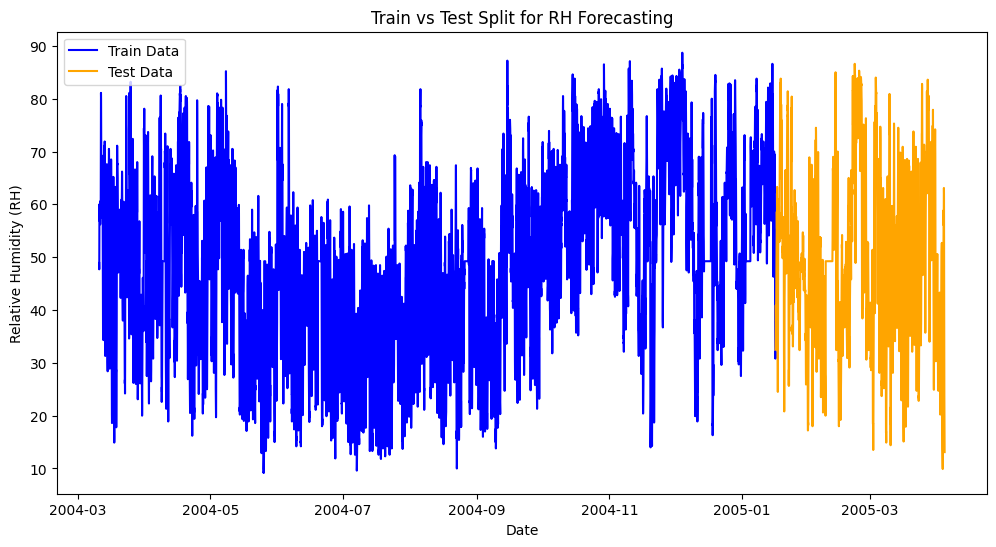

In [580]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# Plot training data
plt.plot(train['ds'], train['y'], label='Train Data', color='blue')

# Plot testing data
plt.plot(test['ds'], test['y'], label='Test Data', color='orange')

plt.xlabel("Date")
plt.ylabel("Relative Humidity (RH)")
plt.title("Train vs Test Split for RH Forecasting")
plt.legend()
plt.show()


**PROPHET MODEL IMPLEMENTATION**

In [581]:
from prophet import Prophet

*****PROPHET TRAINING BY MODEL*****

In [582]:
model=Prophet()
model.fit(train)

20:19:49 - cmdstanpy - INFO - Chain [1] start processing
20:19:50 - cmdstanpy - INFO - Chain [1] done processing


In [583]:
# Make a future dataframe (includes both train + test periods)
future = model.make_future_dataframe(periods=len(test), freq="h")  

# Generate forecast
forecast = model.predict(future)

# Extract predictions that match test period only
pred = forecast[['ds', 'yhat']].set_index('ds').loc[test['ds']]


In [584]:
print("Full forecast (first 5 rows):")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

print("\nPredictions for test period (last 5 rows):")
print(pred.tail())


Full forecast (first 5 rows):
                   ds       yhat  yhat_lower  yhat_upper
0 2004-03-10 18:00:00  44.274422   30.138008   58.605059
1 2004-03-10 19:00:00  47.717304   31.352789   63.005450
2 2004-03-10 20:00:00  50.935861   36.469018   64.630309
3 2004-03-10 21:00:00  53.339422   38.484733   68.788767
4 2004-03-10 22:00:00  55.035987   40.353554   70.004596

Predictions for test period (last 5 rows):
                          yhat
ds                            
2005-04-04 10:00:00  52.704348
2005-04-04 11:00:00  47.869366
2005-04-04 12:00:00  44.974558
2005-04-04 13:00:00  43.749767
2005-04-04 14:00:00  43.325875


<i>from above table we can see range of prediction with min and max and also exact prediction. now we have trained the model on training data and made future dataframe which is test dataset to check accuracy of model</i>

***CHECKING ACCURACY for relative humidity**

In [585]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [586]:
y_actual=test['y'].values
y_predict=pred['yhat'].values

In [587]:
# Metrics
mae = mean_absolute_error(y_actual, y_predict)   # Avg error in same units as RH
rmse = np.sqrt(mean_squared_error(y_actual, y_predict))  # Penalizes large errors
mape = np.mean(np.abs((y_actual - y_predict) / y_actual)) * 100  # % error

print(f"MAE  (Mean Absolute Error): {mae:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"MAPE (Mean Absolute % Error): {mape:.2f}%")

MAE  (Mean Absolute Error): 13.06
RMSE (Root Mean Squared Error): 15.66
MAPE (Mean Absolute % Error): 34.08%


📊 How good is this?

In forecasting, MAPE < 10% → excellent

10–20% → good

20–50% → acceptable (depends on use case)

>50% → poor

So  model is in the acceptable range (34%), but not “very accurate.”

It means Prophet is capturing the broad trend but missing finer variations.

ACTUAL VS PREDICTED TREND IN REALTIVE HUMIDITY for test data

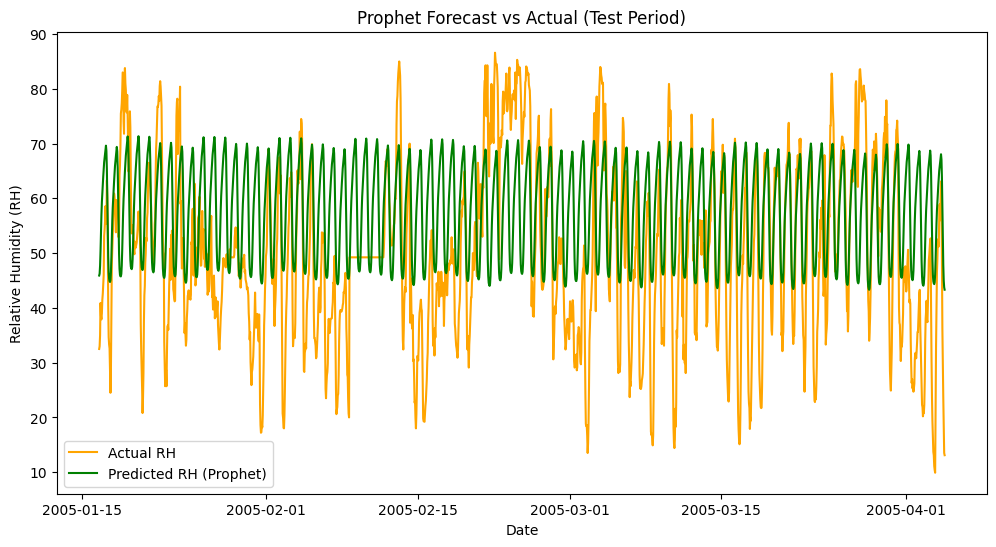

In [588]:
plt.figure(figsize=(12,6))
plt.plot(test['ds'], test['y'], label='Actual RH', color='orange')
plt.plot(test['ds'], pred['yhat'], label='Predicted RH (Prophet)', color='green')
plt.xlabel("Date")
plt.ylabel("Relative Humidity (RH)")
plt.title("Prophet Forecast vs Actual (Test Period)")
plt.legend()
plt.show()


## data visualisation of REALTIVE HUMIDITY

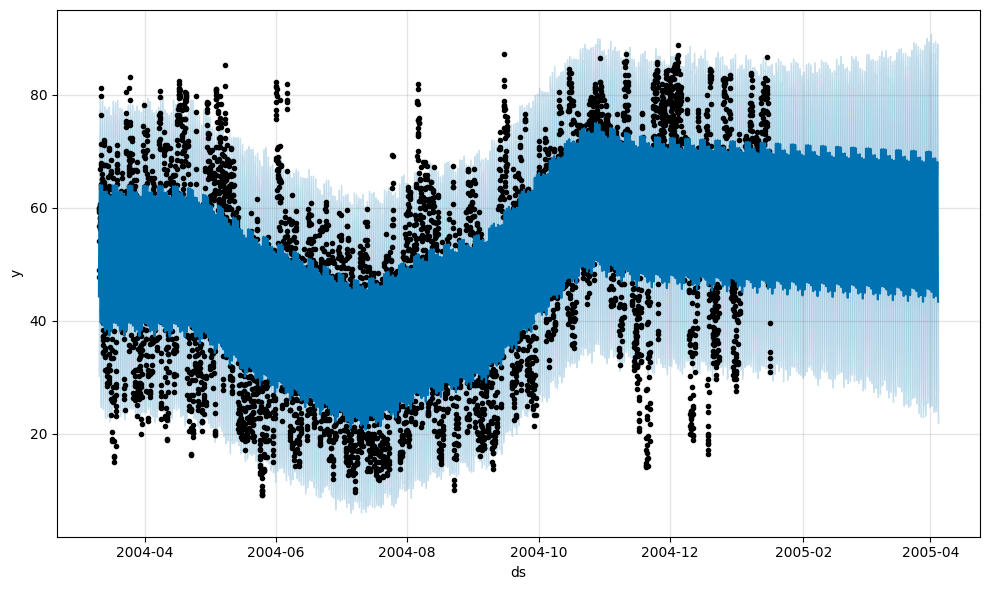

In [589]:
fig1 = model.plot(forecast)



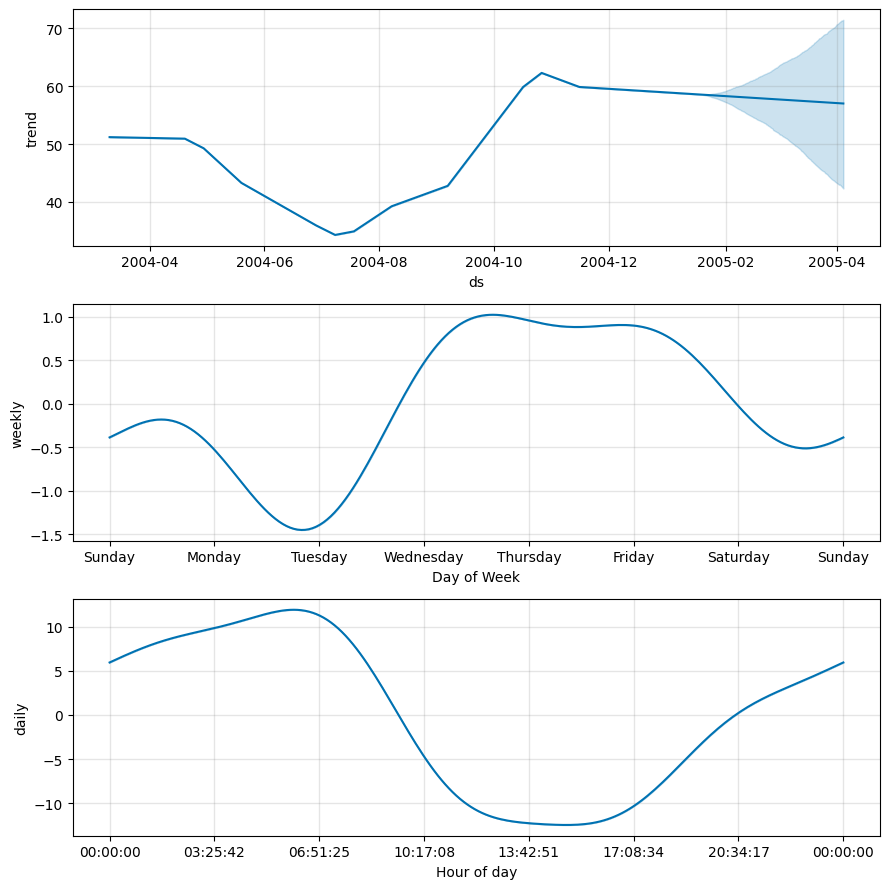

In [590]:
fig2 = model.plot_components(forecast)


**AT THIS STEP WE HAVE SUCCESSFULLY TRAINED, TESTED the model now forecasting part is needed**

## FORECASTING

In [591]:
# Forecast for next 2500 hours
future = model.make_future_dataframe(periods=2500, freq="h")
forecast = model.predict(future)


In [592]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(20)


ds       yhat  yhat_lower  yhat_upper
9965 2005-04-29 23:00:00  60.886138   33.898718   87.331287
9966 2005-04-30 00:00:00  62.414606   35.706698   89.569478
9967 2005-04-30 01:00:00  63.885278   36.714253   91.250406
9968 2005-04-30 02:00:00  65.012205   39.773267   92.740042
9969 2005-04-30 03:00:00  65.811257   39.536031   94.479497
9970 2005-04-30 04:00:00  66.612060   40.082729   93.543151
9971 2005-04-30 05:00:00  67.553991   41.847007   94.299023
9972 2005-04-30 06:00:00  68.096543   44.179806   94.294937
9973 2005-04-30 07:00:00  67.161507   40.098999   92.783842
9974 2005-04-30 08:00:00  63.941132   39.098152   90.850948
9975 2005-04-30 09:00:00  58.707394   32.486757   85.346794
9976 2005-04-30 10:00:00  52.854684   27.154405   79.853582
9977 2005-04-30 11:00:00  48.052706   21.909629   75.780255
9978 2005-04-30 12:00:00  45.191820   20.073476   73.131040
9979 2005-04-30 13:00:00  44.001296   18.110725   70.312611
9980 2005-04-30 14:00:00  43.611421   17.912748   70.422841
9981 2005-04-30 15:00:00  43.484338   19.671015   71.058466
9982 2005-04-30 16:00:00  43.850107   17.693580   69.458820
9983 2005-04-30 17:00:00  45.306327   18.851664   72.116960
9984 2005-04-30 18:00:00  48.047806   22.568225   72.979373

now we can see [from above table] that our model is predicted for future dates as in our dataset(training+testing) last date was 4 april 2005 but we successfully predicted for future dates till 30 april 2005 for RH feature

## TRAINING , TESTING AND PREDICTION FOR OTHER ATTRIBUTES


###  FOR CO(GT) FEATURE

In [593]:
data.head()

ds     y
0 2004-03-10 18:00:00  48.9
1 2004-03-10 19:00:00  47.7
2 2004-03-10 20:00:00  54.0
3 2004-03-10 21:00:00  60.0
4 2004-03-10 22:00:00  59.6

In [594]:
data['y']=air_quality_data['CO(GT)']

In [595]:
data.head()

ds    y
0 2004-03-10 18:00:00  2.6
1 2004-03-10 19:00:00  2.0
2 2004-03-10 20:00:00  2.2
3 2004-03-10 21:00:00  2.2
4 2004-03-10 22:00:00  1.6

y values indicates values of CO(GT) column/feature

In [596]:
#splitting data into training and testing --> 80% for training and 20% for testing
train_size=int(len(data)*0.8);
train=data[:train_size]
test=data[train_size:]

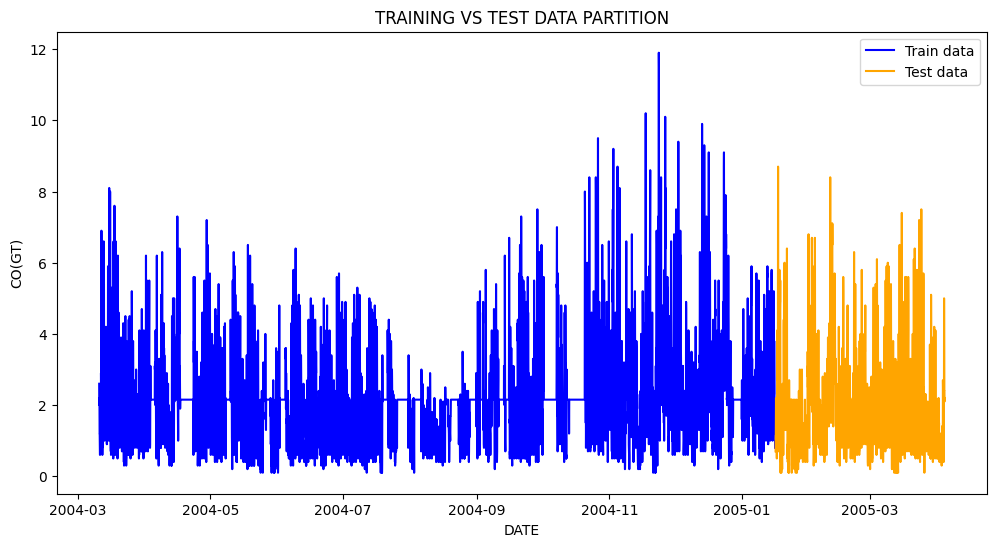

In [597]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(train['ds'],train['y'],label='Train data',color='blue')
plt.plot(test['ds'],test['y'],label='Test data',color='orange')
plt.xlabel("DATE")
plt.ylabel("CO(GT)")
plt.title("TRAINING VS TEST DATA PARTITION")
plt.legend()
plt.show()

prophet model implementation

In [598]:
from prophet import Prophet

In [599]:
model=Prophet()
model.fit(train)

20:19:56 - cmdstanpy - INFO - Chain [1] start processing
20:19:57 - cmdstanpy - INFO - Chain [1] done processing


In [600]:
future=model.make_future_dataframe(periods=len(test),freq="h")
forecast=model.predict(future)
pred=forecast[['ds','yhat']].set_index('ds').loc[test['ds']]
print(pred.tail())

                         yhat
ds                           
2005-04-04 10:00:00  2.772201
2005-04-04 11:00:00  2.603268
2005-04-04 12:00:00  2.462102
2005-04-04 13:00:00  2.385342
2005-04-04 14:00:00  2.377340


now we are done with prediction of CO(GT) for test data

**CHECKING ACCURACY FOR CO(GT) FEATURE**

In [601]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [602]:
y_actual=test['y'].values
y_predict=pred['yhat'].values

In [603]:
print(y_actual)
print(y_predict)

[0.7 1.1 1.1 ... 2.4 2.1 2.2]
[2.05205168 2.32269534 2.74877248 ... 2.46210229 2.38534214 2.3773402 ]


In [604]:
# Metrics
mae = mean_absolute_error(y_actual, y_predict)   # Avg error in same units as CO
rmse = np.sqrt(mean_squared_error(y_actual, y_predict))  # Penalizes large errors
smape = 100 * np.mean(np.abs(y_actual - y_predict) / ((np.abs(y_actual) + np.abs(y_predict)) / 2)) #since CO values are very small so we use smape

print(f"MAE  (Mean Absolute Error): {mae:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")

print(f"SMAPE (Symmetric Mean Absolute % Error): {smape:.2f}%")

MAE  (Mean Absolute Error): 1.08
RMSE (Root Mean Squared Error): 1.28
SMAPE (Symmetric Mean Absolute % Error): 54.87%


**Interpretation**

- Accuracy in units (MAE & RMSE)

Both MAE (~1.08) and RMSE (~1.28) show  model predicts very close to actual CO levels.

Small difference between MAE and RMSE → no extreme outliers; most predictions are consistently close.

- Relative error (SMAPE)

SMAPE = 54.87% sounds high, but it reflects the relative scale of CO values.

If some actual CO values are very small, even small absolute errors cause a higher relative error.

- Overall

Model performs well in absolute terms (MAE & RMSE).

SMAPE highlights that relative error can be large when actual values are small, but the predictions are still close in absolute CO units.

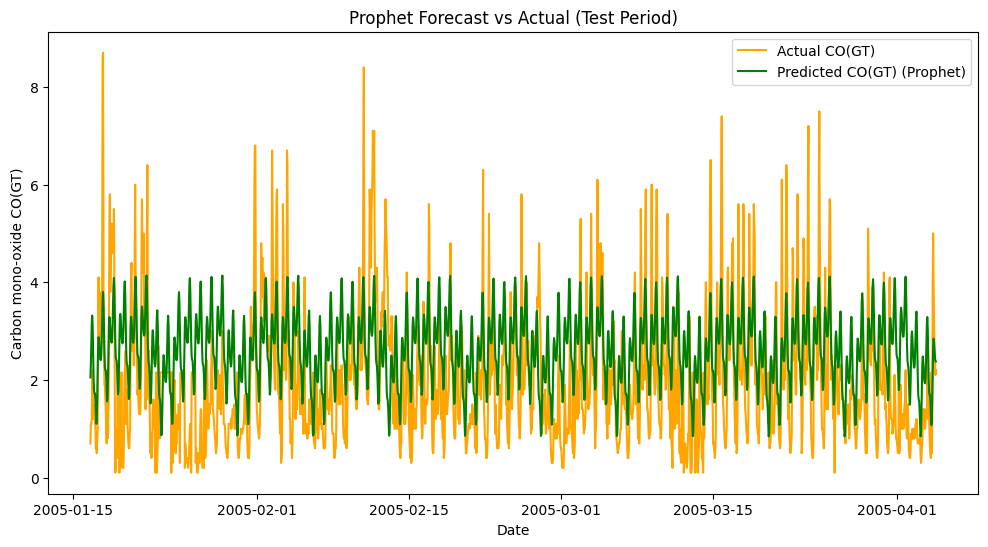

In [605]:
plt.figure(figsize=(12,6))
plt.plot(test['ds'], test['y'], label='Actual CO(GT)', color='orange')
plt.plot(test['ds'], pred['yhat'], label='Predicted CO(GT) (Prophet)', color='green')
plt.xlabel("Date")
plt.ylabel("Carbon mono-oxide CO(GT)")
plt.title("Prophet Forecast vs Actual (Test Period)")
plt.legend()
plt.show()

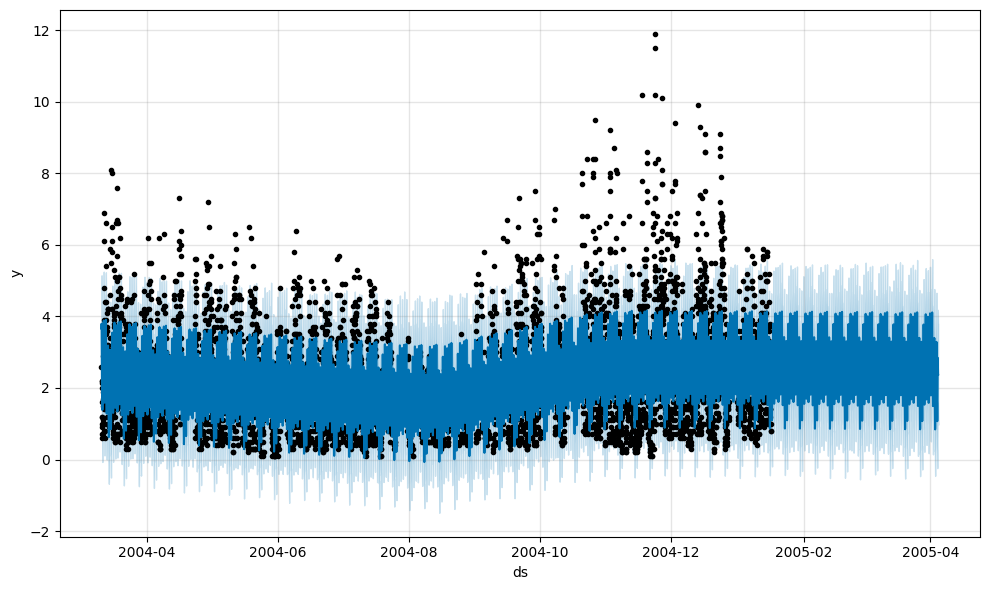

In [606]:
fig1=model.plot(forecast)

#### FORECASTING of CO(GT)

In [607]:
# Forecast for next 2500 hours
future = model.make_future_dataframe(periods=2500, freq="h")
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(20)

ds      yhat  yhat_lower  yhat_upper
9965 2005-04-29 23:00:00  2.400976    0.904807    3.698710
9966 2005-04-30 00:00:00  2.304338    0.894734    3.760910
9967 2005-04-30 01:00:00  2.256575    0.900738    3.609735
9968 2005-04-30 02:00:00  2.067413    0.689099    3.486589
9969 2005-04-30 03:00:00  1.740057    0.440600    3.095908
9970 2005-04-30 04:00:00  1.482771    0.099165    2.898950
9971 2005-04-30 05:00:00  1.525801    0.163015    3.002780
9972 2005-04-30 06:00:00  1.912065    0.496588    3.276679
9973 2005-04-30 07:00:00  2.449495    1.101618    3.952199
9974 2005-04-30 08:00:00  2.859685    1.453437    4.197118
9975 2005-04-30 09:00:00  2.981465    1.691075    4.463265
9976 2005-04-30 10:00:00  2.853532    1.559116    4.212148
9977 2005-04-30 11:00:00  2.629191    1.218990    4.003464
9978 2005-04-30 12:00:00  2.433089    0.977906    3.851731
9979 2005-04-30 13:00:00  2.302075    0.949543    3.721378
9980 2005-04-30 14:00:00  2.240707    0.864096    3.617951
9981 2005-04-30 15:00:00  2.292832    0.830397    3.612223
9982 2005-04-30 16:00:00  2.521349    1.045646    3.840146
9983 2005-04-30 17:00:00  2.904976    1.489288    4.164855
9984 2005-04-30 18:00:00  3.274037    1.916905    4.667394

now we can see [from above table] that our model is predicted for future dates as in our dataset(training+testing) last date was 4 april 2005 but we successfully predicted for future dates till 30 april 2005 for CO(GT) Feature

In [608]:
joblib.dump(model, "prophet_CO_model.pkl")

['prophet_CO_model.pkl']

### FOR TEMPERATURE(T in degree celcius) FEATURE 

In [609]:
data.head()

ds    y
0 2004-03-10 18:00:00  2.6
1 2004-03-10 19:00:00  2.0
2 2004-03-10 20:00:00  2.2
3 2004-03-10 21:00:00  2.2
4 2004-03-10 22:00:00  1.6

In [610]:
data['y']=air_quality_data['T']

In [611]:
data.head()

ds     y
0 2004-03-10 18:00:00  13.6
1 2004-03-10 19:00:00  13.3
2 2004-03-10 20:00:00  11.9
3 2004-03-10 21:00:00  11.0
4 2004-03-10 22:00:00  11.2

y values indicates values of T(TEMPERATURE) column/feature

In [612]:
#splitting data into training and testing --> 80% for training and 20% for testing
train_size=int(len(data)*0.8);
train=data[:train_size]
test=data[train_size:]

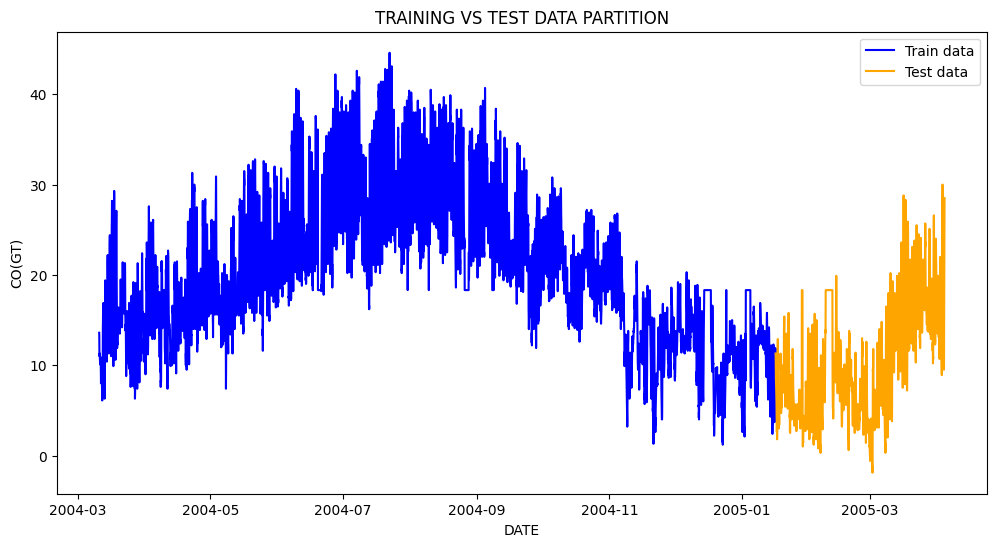

In [613]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(train['ds'],train['y'],label='Train data',color='blue')
plt.plot(test['ds'],test['y'],label='Test data',color='orange')
plt.xlabel("DATE")
plt.ylabel("CO(GT)")
plt.title("TRAINING VS TEST DATA PARTITION")
plt.legend()
plt.show()

In [614]:

from prophet import Prophet

In [615]:
model=Prophet()
model.fit(train)

20:20:02 - cmdstanpy - INFO - Chain [1] start processing
20:20:04 - cmdstanpy - INFO - Chain [1] done processing


In [616]:
future=model.make_future_dataframe(periods=len(test),freq="h")
forecast=model.predict(future)
pred=forecast[['ds','yhat']].set_index('ds').loc[test['ds']]
print(pred.tail())

                          yhat
ds                            
2005-04-04 10:00:00   7.783039
2005-04-04 11:00:00   9.617362
2005-04-04 12:00:00  10.764345
2005-04-04 13:00:00  11.317473
2005-04-04 14:00:00  11.594833


now we are done with prediction of T(TEMPERATURE) for test data

**CHECKING ACCURACY FOR TEMPEARTURE FEATURE**

In [617]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [618]:
y_actual=test['y'].values
y_predict=pred['yhat'].values

In [619]:
print(y_actual)
print(y_predict)

[11.3 11.  10.3 ... 26.9 28.3 28.5]
[14.86122436 14.77088135 14.17778792 ... 10.76434545 11.31747255
 11.59483269]


In [620]:
# Metrics
mae = mean_absolute_error(y_actual, y_predict)   # Avg error in same units as TEMPEARTURE
rmse = np.sqrt(mean_squared_error(y_actual, y_predict))  # Penalizes large errors
smape = 100 * np.mean(np.abs(y_actual - y_predict) / ((np.abs(y_actual) + np.abs(y_predict)) / 2)) #since temp values may be 0 celcius so we use smape

print(f"MAE  (Mean Absolute Error): {mae:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")

print(f"SMAPE (Symmetric Mean Absolute % Error): {smape:.2f}%")

MAE  (Mean Absolute Error): 5.10
RMSE (Root Mean Squared Error): 6.31
SMAPE (Symmetric Mean Absolute % Error): 55.14%


***Interpretation***

- Absolute accuracy (MAE & RMSE)

MAE = 5.10°C → Most predictions are within ±5°C of actual temperature.

RMSE = 6.31°C → Some predictions are slightly worse, which pulls the RMSE higher than MAE.

- Relative error (SMAPE)

SMAPE = 55% → Percentage error looks high, but this is because temperature in Celsius can be low (near 0°C). Even small absolute errors appear as large percentages.

For practical purposes, focus on MAE/RMSE for temperature predictions rather than SMAPE.

 - Overall evaluation

Model captures temperature trend but has moderate errors (~5°C).

SMAPE exaggerates errors due to low temperature values, but MAE and RMSE give a clear picture of actual prediction performance.

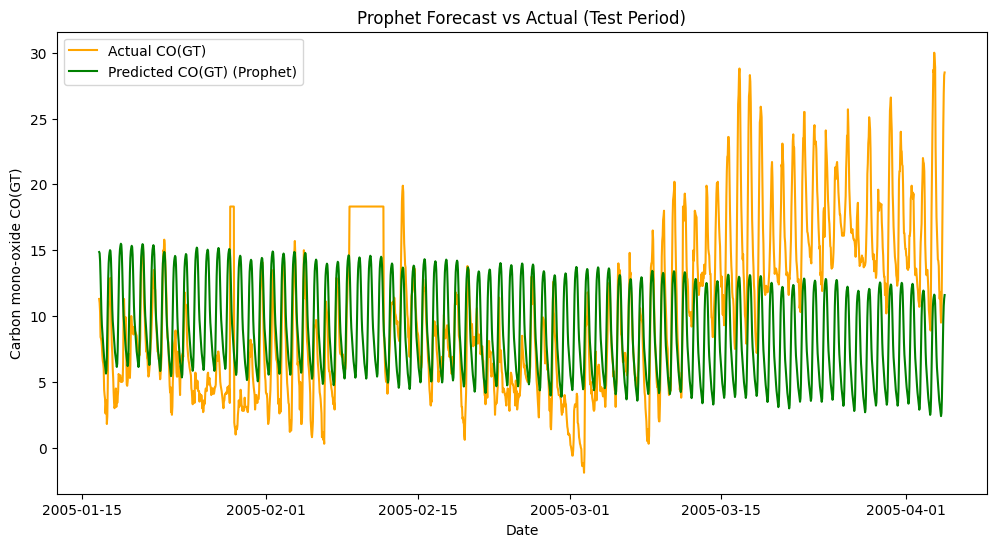

In [621]:
plt.figure(figsize=(12,6))
plt.plot(test['ds'], test['y'], label='Actual CO(GT)', color='orange')
plt.plot(test['ds'], pred['yhat'], label='Predicted CO(GT) (Prophet)', color='green')
plt.xlabel("Date")
plt.ylabel("Carbon mono-oxide CO(GT)")
plt.title("Prophet Forecast vs Actual (Test Period)")
plt.legend()
plt.show()

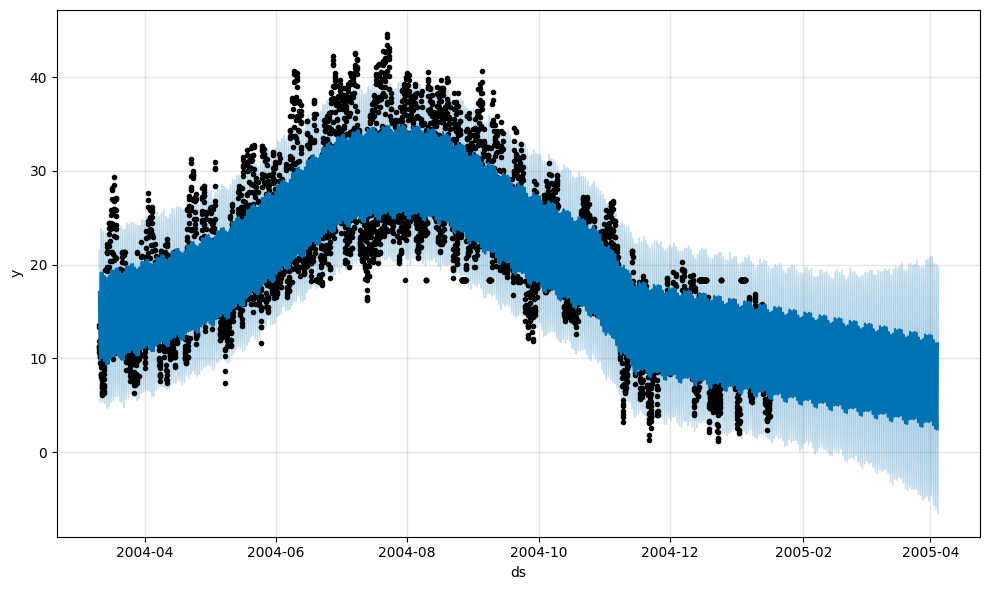

In [622]:
fig1=model.plot(forecast)

#### FORECASTING FOR TEMPERATURE 

In [623]:
# Forecast for next 2500 hours
future = model.make_future_dataframe(periods=2500, freq="h")
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(20)

ds       yhat  yhat_lower  yhat_upper
9965 2005-04-29 23:00:00   4.584781   -7.429494   16.840654
9966 2005-04-30 00:00:00   4.038499   -8.328883   16.804384
9967 2005-04-30 01:00:00   3.465089   -8.918986   15.737900
9968 2005-04-30 02:00:00   3.004672   -9.190947   15.345716
9969 2005-04-30 03:00:00   2.685155   -9.889865   14.625099
9970 2005-04-30 04:00:00   2.379887  -10.014748   14.456167
9971 2005-04-30 05:00:00   1.998902   -9.939077   14.449768
9972 2005-04-30 06:00:00   1.710026  -10.412684   13.968600
9973 2005-04-30 07:00:00   1.920800  -10.935801   14.445609
9974 2005-04-30 08:00:00   2.975880   -9.076937   15.111934
9975 2005-04-30 09:00:00   4.821917   -8.237437   17.230983
9976 2005-04-30 10:00:00   6.959834   -4.766021   19.541158
9977 2005-04-30 11:00:00   8.758216   -3.819845   21.124872
9978 2005-04-30 12:00:00   9.868460   -2.561093   21.914069
9979 2005-04-30 13:00:00  10.384118   -1.804390   22.966627
9980 2005-04-30 14:00:00  10.623355   -1.621256   23.776071
9981 2005-04-30 15:00:00  10.760712   -1.351871   22.973049
9982 2005-04-30 16:00:00  10.661086   -1.686081   23.327609
9983 2005-04-30 17:00:00  10.058428   -2.320941   22.062473
9984 2005-04-30 18:00:00   8.883958   -4.084658   21.251383

now we can see [from above table] that our model is predicted for future dates as in our dataset(training+testing) last date was 4 april 2005 but we successfully predicted for future dates till 30 april 2005 for temperature Feature

### FOR  PT08.S1 (carbon mono-oxide)

In [624]:
data.head()

ds     y
0 2004-03-10 18:00:00  13.6
1 2004-03-10 19:00:00  13.3
2 2004-03-10 20:00:00  11.9
3 2004-03-10 21:00:00  11.0
4 2004-03-10 22:00:00  11.2

In [625]:
data['y']=air_quality_data['PT08.S1(CO)']

In [626]:
data.head()

ds       y
0 2004-03-10 18:00:00  1360.0
1 2004-03-10 19:00:00  1292.0
2 2004-03-10 20:00:00  1402.0
3 2004-03-10 21:00:00  1376.0
4 2004-03-10 22:00:00  1272.0

y represents  PT08.S1(CO) in just above table

In [627]:
train_size=int(len(data)*0.8)
train=data[:train_size]
test=data[train_size:]

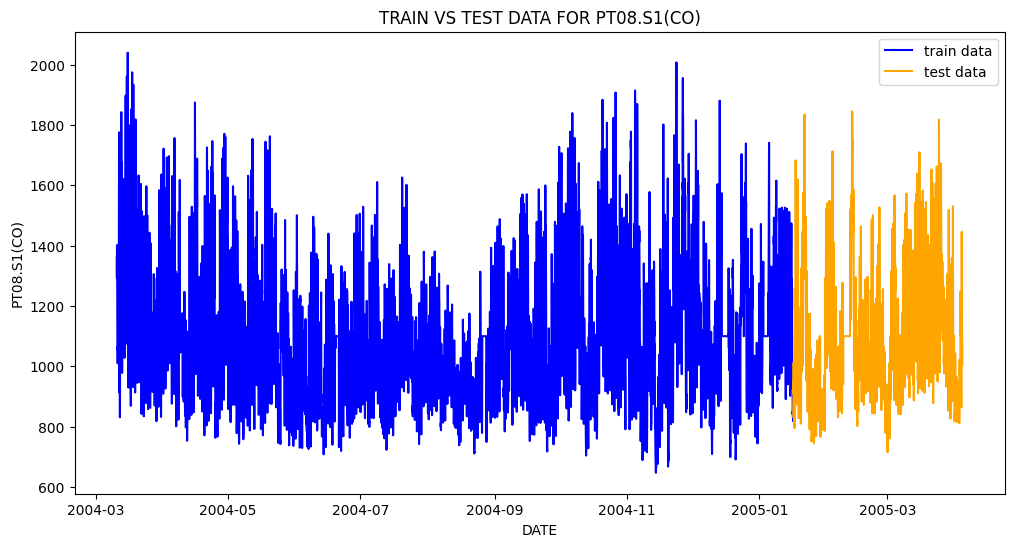

In [628]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.title("TRAIN VS TEST DATA FOR PT08.S1(CO)")
plt.xlabel("DATE")
plt.ylabel("PT08.S1(CO)")
plt.plot(train['ds'],train['y'], label="train data", color="blue")
plt.plot(test['ds'],test['y'], label="test data", color="orange")
plt.legend()
plt.show()

In [629]:
from prophet import Prophet

model=Prophet()
model.fit(train)

20:20:10 - cmdstanpy - INFO - Chain [1] start processing
20:20:11 - cmdstanpy - INFO - Chain [1] done processing


In [630]:
# Make a future dataframe (includes both train + test periods)
future = model.make_future_dataframe(periods=len(test), freq="h")  

# Generate forecast
forecast = model.predict(future)

# Extract predictions that match test period only
pred = forecast[['ds', 'yhat']].set_index('ds').loc[test['ds']]

In [631]:
print("Full forecast (first 5 rows):")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

print("\nPredictions for test period (last 5 rows):")
print(pred.tail())

Full forecast (first 5 rows):
                   ds         yhat   yhat_lower   yhat_upper
0 2004-03-10 18:00:00  1475.076368  1283.347699  1695.742328
1 2004-03-10 19:00:00  1488.275382  1273.489856  1689.539331
2 2004-03-10 20:00:00  1448.708703  1237.809448  1665.401878
3 2004-03-10 21:00:00  1377.649450  1173.803070  1598.855613
4 2004-03-10 22:00:00  1315.068291  1094.979581  1523.317878

Predictions for test period (last 5 rows):
                            yhat
ds                              
2005-04-04 10:00:00  1225.787515
2005-04-04 11:00:00  1189.014914
2005-04-04 12:00:00  1165.190212
2005-04-04 13:00:00  1155.232777
2005-04-04 14:00:00  1154.221730


In [632]:

from sklearn.metrics import mean_absolute_error, mean_squared_error
y_actual=test['y'].values
y_predict=pred['yhat'].values
# Metrics
mae = mean_absolute_error(y_actual, y_predict)   # Avg error in same units as PT08.S1(CO)
rmse = np.sqrt(mean_squared_error(y_actual, y_predict))  # Penalizes large errors
mape = np.mean(np.abs((y_actual - y_predict) / y_actual)) * 100  # % error

print(f"MAE  (Mean Absolute Error): {mae:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"MAPE (Mean Absolute % Error): {mape:.2f}%")

MAE  (Mean Absolute Error): 153.50
RMSE (Root Mean Squared Error): 191.26
MAPE (Mean Absolute % Error): 14.78%


**What  metrics mean?**

- MAE = 153.50
→ On average,  predictions are off by about 153 sensor units.

- RMSE = 191.26
→ Larger mistakes hurt more. So sometimes  model is ~190+ units away from the actual value.

- MAPE = 14.78%
→ On average,  predictions deviate ~15% from the true values.

For environmental/air quality datasets, <20% MAPE is considered acceptable.


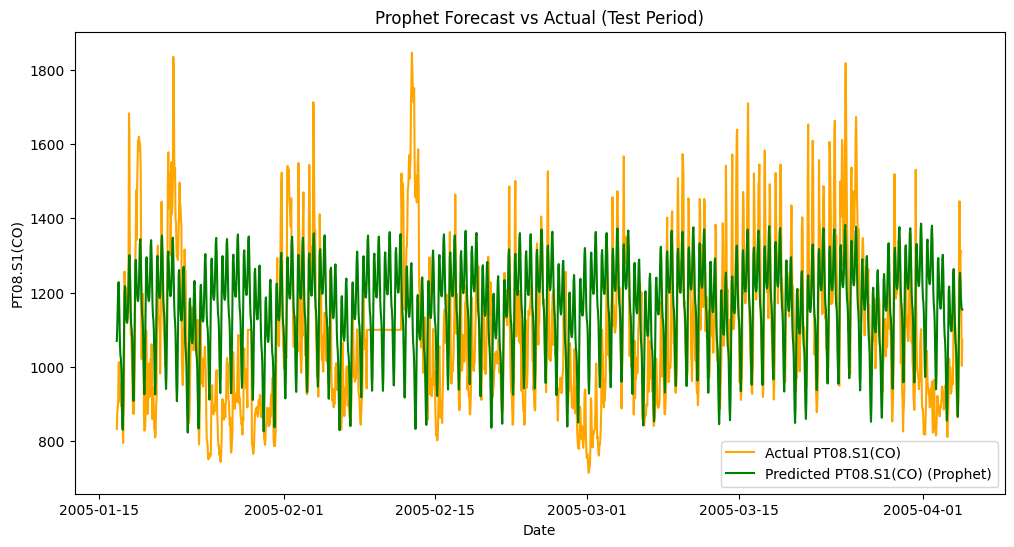

In [633]:
plt.figure(figsize=(12,6))
plt.plot(test['ds'], test['y'], label='Actual PT08.S1(CO)', color='orange')
plt.plot(test['ds'], pred['yhat'], label='Predicted PT08.S1(CO) (Prophet)', color='green')
plt.xlabel("Date")
plt.ylabel("PT08.S1(CO)")
plt.title("Prophet Forecast vs Actual (Test Period)")
plt.legend()
plt.show()

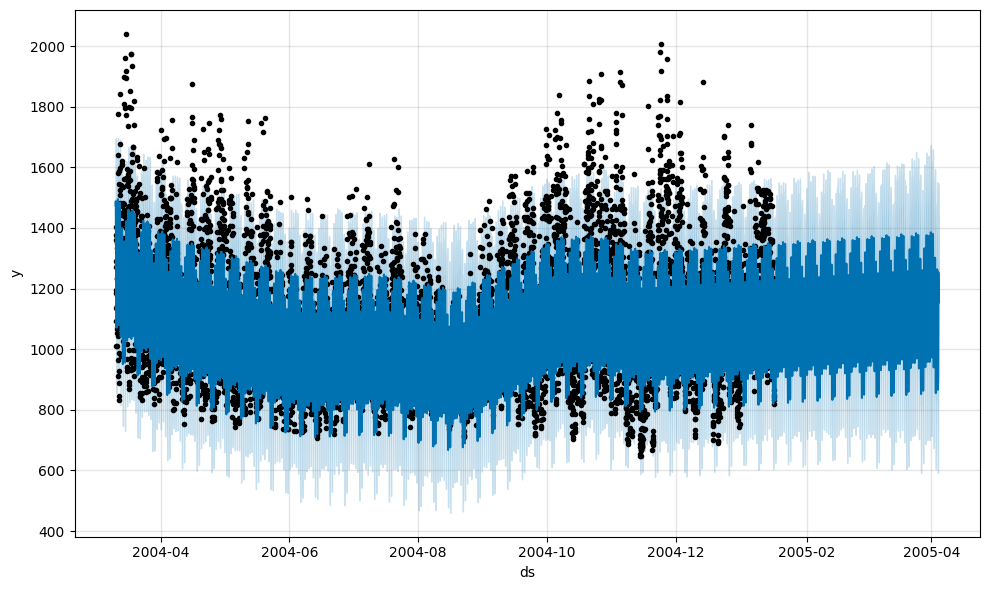

In [634]:
fig1=model.plot(forecast)

#### FORECASTING OF PT08.S1(CO)

In [635]:
# Forecast for next 2500 hours
future = model.make_future_dataframe(periods=2500, freq="h")
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(20)

ds         yhat  yhat_lower   yhat_upper
9965 2005-04-29 23:00:00  1181.124352  862.833162  1533.942871
9966 2005-04-30 00:00:00  1166.299774  835.466390  1485.884083
9967 2005-04-30 01:00:00  1134.645926  830.594937  1458.638478
9968 2005-04-30 02:00:00  1068.070308  752.213227  1398.324749
9969 2005-04-30 03:00:00   990.294880  657.504128  1332.805101
9970 2005-04-30 04:00:00   952.899423  630.609506  1286.053610
9971 2005-04-30 05:00:00   992.935039  641.966718  1306.131533
9972 2005-04-30 06:00:00  1099.519088  760.045092  1420.441677
9973 2005-04-30 07:00:00  1219.245962  884.978975  1537.942443
9974 2005-04-30 08:00:00  1295.316324  954.909106  1644.521709
9975 2005-04-30 09:00:00  1305.996946  967.257046  1630.783981
9976 2005-04-30 10:00:00  1271.218528  955.794435  1611.568843
9977 2005-04-30 11:00:00  1227.045000  920.546075  1554.788472
9978 2005-04-30 12:00:00  1195.743132  867.148216  1526.322405
9979 2005-04-30 13:00:00  1178.262294  852.460419  1504.482626
9980 2005-04-30 14:00:00  1169.711821  831.194869  1518.298098
9981 2005-04-30 15:00:00  1175.028928  850.834949  1526.641104
9982 2005-04-30 16:00:00  1204.952394  881.983536  1524.324342
9983 2005-04-30 17:00:00  1256.994126  923.589077  1570.992326
9984 2005-04-30 18:00:00  1305.175970  988.029207  1629.599599

now we can see [from above table] that our model is predicted for future dates as in our dataset(training+testing) last date was 4 april 2005 but we successfully predicted for future dates till 30 april 2005 for PT08.S1(CO)-carbon mono-oxide Feature

### FOR NMHC(GT) FEATURE

In [636]:
data.head()

ds       y
0 2004-03-10 18:00:00  1360.0
1 2004-03-10 19:00:00  1292.0
2 2004-03-10 20:00:00  1402.0
3 2004-03-10 21:00:00  1376.0
4 2004-03-10 22:00:00  1272.0

In [637]:
data['y']=air_quality_data['NMHC(GT)']

In [638]:
data.head()

ds      y
0 2004-03-10 18:00:00  150.0
1 2004-03-10 19:00:00  112.0
2 2004-03-10 20:00:00   88.0
3 2004-03-10 21:00:00   80.0
4 2004-03-10 22:00:00   51.0

In [639]:
train_size=int(len(data)*0.8)
train=data[:train_size]
test=data[train_size:]

In [640]:
print(train)
print(test)

                      ds           y
0    2004-03-10 18:00:00  150.000000
1    2004-03-10 19:00:00  112.000000
2    2004-03-10 20:00:00   88.000000
3    2004-03-10 21:00:00   80.000000
4    2004-03-10 22:00:00   51.000000
...                  ...         ...
7480 2005-01-16 10:00:00  218.811816
7481 2005-01-16 11:00:00  218.811816
7482 2005-01-16 12:00:00  218.811816
7483 2005-01-16 13:00:00  218.811816
7484 2005-01-16 14:00:00  218.811816

[7485 rows x 2 columns]
                      ds           y
7485 2005-01-16 15:00:00  218.811816
7486 2005-01-16 16:00:00  218.811816
7487 2005-01-16 17:00:00  218.811816
7488 2005-01-16 18:00:00  218.811816
7489 2005-01-16 19:00:00  218.811816
...                  ...         ...
9352 2005-04-04 10:00:00  218.811816
9353 2005-04-04 11:00:00  218.811816
9354 2005-04-04 12:00:00  218.811816
9355 2005-04-04 13:00:00  218.811816
9356 2005-04-04 14:00:00  218.811816

[1872 rows x 2 columns]


In [641]:
from prophet import Prophet

model=Prophet()
model.fit(train)

20:20:16 - cmdstanpy - INFO - Chain [1] start processing
20:20:17 - cmdstanpy - INFO - Chain [1] done processing


In [642]:
# Make a future dataframe (includes both train + test periods)
future = model.make_future_dataframe(periods=len(test), freq="h")  

# Generate forecast
forecast = model.predict(future)

# Extract predictions that match test period only
pred = forecast[['ds', 'yhat']].set_index('ds').loc[test['ds']]

In [643]:
print("Full forecast (first 5 rows):")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

print("\nPredictions for test period (last 5 rows):")
print(pred.tail())

Full forecast (first 5 rows):
                   ds        yhat  yhat_lower  yhat_upper
0 2004-03-10 18:00:00  186.970095   99.262369  280.769793
1 2004-03-10 19:00:00  193.045771  107.453268  283.272334
2 2004-03-10 20:00:00  187.926759   94.947574  282.819705
3 2004-03-10 21:00:00  173.133424   83.116331  265.355425
4 2004-03-10 22:00:00  157.349791   67.577480  251.011566

Predictions for test period (last 5 rows):
                           yhat
ds                             
2005-04-04 10:00:00  223.225110
2005-04-04 11:00:00  217.191524
2005-04-04 12:00:00  215.148923
2005-04-04 13:00:00  215.706923
2005-04-04 14:00:00  215.762433


In [644]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_actual=test['y'].values
y_predict=pred['yhat'].values
# Metrics
mae = mean_absolute_error(y_actual, y_predict)   # Avg error in same units as NMHC(GT)
rmse = np.sqrt(mean_squared_error(y_actual, y_predict))  # Penalizes large errors
mape = np.mean(np.abs((y_actual - y_predict) / y_actual)) * 100  # % error

print(f"MAE  (Mean Absolute Error): {mae:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"MAPE (Mean Absolute % Error): {mape:.2f}%")

MAE  (Mean Absolute Error): 13.99
RMSE (Root Mean Squared Error): 16.87
MAPE (Mean Absolute % Error): 6.39%


- MAE = 13.99
→ On average, your model’s prediction is off by about 14 µg/m³ (the same unit as NMHC concentration).

- RMSE = 16.87
→ The root mean squared error penalizes larger mistakes. So sometimes the model is off by ~17 µg/m³, which is slightly larger than the average error.

- MAPE = 6.39%
→ On average, your predictions deviate ~6% from the true NMHC values.

Very good! Anything under 10% is considered strong for environmental/air-quality predictions.

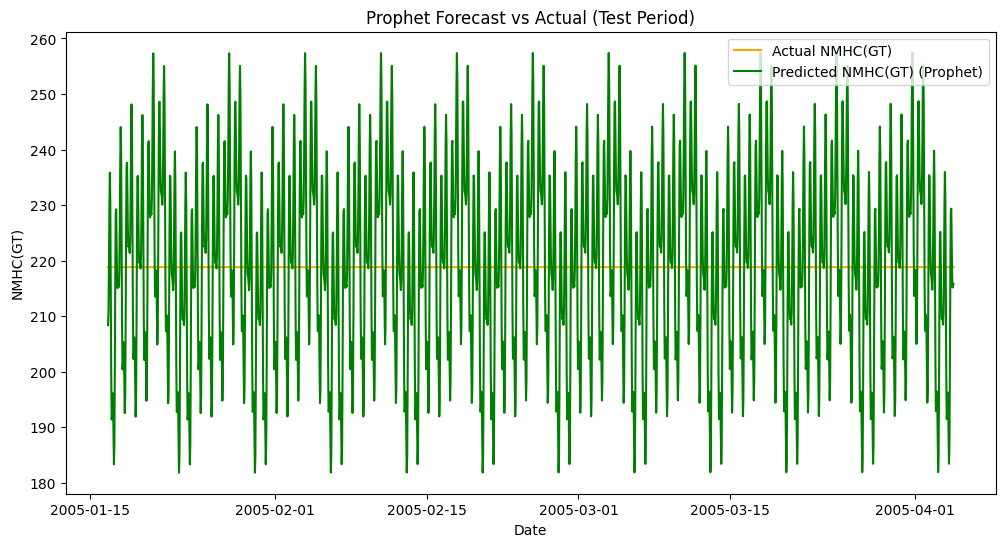

In [645]:
plt.figure(figsize=(12,6))
plt.plot(test['ds'], test['y'], label='Actual NMHC(GT)', color='orange')
plt.plot(test['ds'], pred['yhat'], label='Predicted NMHC(GT) (Prophet)', color='green')
plt.xlabel("Date")
plt.ylabel("NMHC(GT)")
plt.title("Prophet Forecast vs Actual (Test Period)")
plt.legend()
plt.show()

**Note:**
**We observed that the NMHC(GT) feature shows a nearly constant value of ~218.18 in the test data. This occurred because, during preprocessing, all occurrences of -200 (which represent invalid/missing readings) were replaced with the column mean. However, since the NMHC(GT) column contained continuous -200 values from row 1232 to 9357, the imputation resulted in almost all entries being replaced by the mean (218.18). Consequently, the feature lost its variability and became nearly constant in the test set.**

***<span style="color:red">Therefore, the NMHC(GT) feature was dropped due to its lack of informative behavior in the actual data.</span>***

### FOR C6H6(GT) BENZENE FEATURE

In [646]:
data.head()

ds      y
0 2004-03-10 18:00:00  150.0
1 2004-03-10 19:00:00  112.0
2 2004-03-10 20:00:00   88.0
3 2004-03-10 21:00:00   80.0
4 2004-03-10 22:00:00   51.0

In [647]:
data['y']=air_quality_data['C6H6(GT)']

In [648]:
data.head()

ds     y
0 2004-03-10 18:00:00  11.9
1 2004-03-10 19:00:00   9.4
2 2004-03-10 20:00:00   9.0
3 2004-03-10 21:00:00   9.2
4 2004-03-10 22:00:00   6.5

In [649]:
train_size=int(len(data)*0.8)
train=data[:train_size]
test=data[train_size:]
print(train)
print(test)

                      ds     y
0    2004-03-10 18:00:00  11.9
1    2004-03-10 19:00:00   9.4
2    2004-03-10 20:00:00   9.0
3    2004-03-10 21:00:00   9.2
4    2004-03-10 22:00:00   6.5
...                  ...   ...
7480 2005-01-16 10:00:00   2.6
7481 2005-01-16 11:00:00   2.6
7482 2005-01-16 12:00:00   2.2
7483 2005-01-16 13:00:00   3.0
7484 2005-01-16 14:00:00   1.9

[7485 rows x 2 columns]
                      ds     y
7485 2005-01-16 15:00:00   2.0
7486 2005-01-16 16:00:00   2.8
7487 2005-01-16 17:00:00   3.3
7488 2005-01-16 18:00:00   3.4
7489 2005-01-16 19:00:00   7.1
...                  ...   ...
9352 2005-04-04 10:00:00  13.5
9353 2005-04-04 11:00:00  11.4
9354 2005-04-04 12:00:00  12.4
9355 2005-04-04 13:00:00   9.5
9356 2005-04-04 14:00:00  11.9

[1872 rows x 2 columns]


In [650]:

from prophet import Prophet
model=Prophet()
model.fit(train)

20:20:19 - cmdstanpy - INFO - Chain [1] start processing
20:20:21 - cmdstanpy - INFO - Chain [1] done processing


In [651]:
future=model.make_future_dataframe(periods=len(test),freq='h')
forecast=model.predict(future)
pred=forecast[['ds','yhat']].set_index('ds').loc[test['ds']]


In [652]:
print(forecast[['ds','yhat','yhat_lower','yhat_upper']].head())

                   ds       yhat  yhat_lower  yhat_upper
0 2004-03-10 18:00:00  17.894992   10.665733   24.916770
1 2004-03-10 19:00:00  18.409818   10.985395   25.192602
2 2004-03-10 20:00:00  16.561240    9.952376   23.374070
3 2004-03-10 21:00:00  13.225299    6.505522   20.914879
4 2004-03-10 22:00:00  10.257812    3.574348   17.314151


In [653]:
print(pred.tail())

                         yhat
ds                           
2005-04-04 10:00:00  6.859655
2005-04-04 11:00:00  5.487689
2005-04-04 12:00:00  4.813140
2005-04-04 13:00:00  4.718725
2005-04-04 14:00:00  4.850746


***CHECKING ACCURACY FOR C6H6(GT) BENZENE***

In [654]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Actual vs Predicted
y_actual = test['y'].values
y_predict = pred['yhat'].values

# Metrics
mae = mean_absolute_error(y_actual, y_predict)   # Avg error in same units
rmse = np.sqrt(mean_squared_error(y_actual, y_predict))  # Penalizes large errors
smape = 100 * np.mean(
    np.abs(y_actual - y_predict) / ((np.abs(y_actual) + np.abs(y_predict)) / 2)
)

# Print results
print(f"MAE   (Mean Absolute Error): {mae:.2f}")
print(f"RMSE  (Root Mean Squared Error): {rmse:.2f}")
print(f"SMAPE (Symmetric Mean Absolute % Error): {smape:.2f}%")


MAE   (Mean Absolute Error): 4.27
RMSE  (Root Mean Squared Error): 5.58
SMAPE (Symmetric Mean Absolute % Error): 71.15%


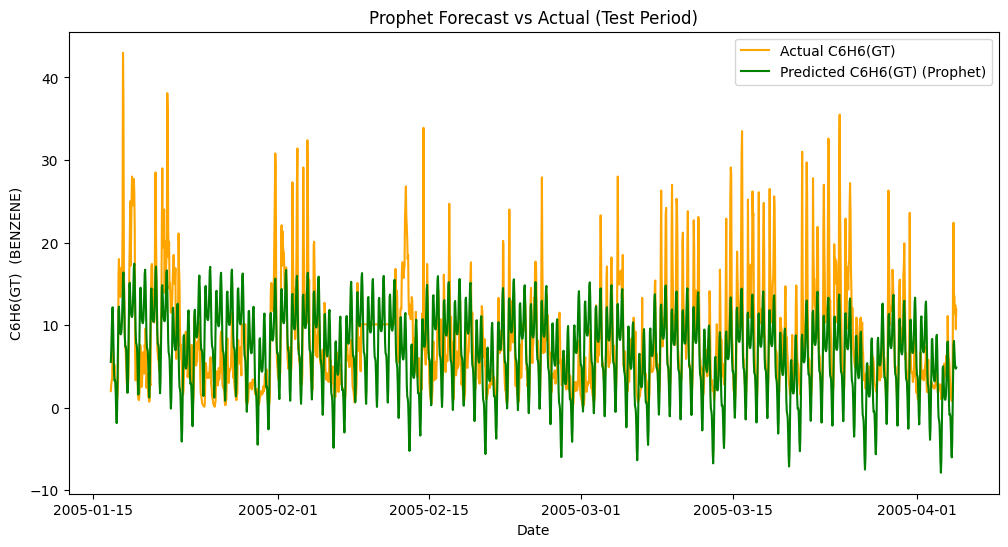

In [655]:
plt.figure(figsize=(12,6))
plt.plot(test['ds'], test['y'], label='Actual C6H6(GT)', color='orange')
plt.plot(test['ds'], pred['yhat'], label='Predicted C6H6(GT) (Prophet)', color='green')
plt.xlabel("Date")
plt.ylabel("C6H6(GT)  (BENZENE)")
plt.title("Prophet Forecast vs Actual (Test Period)")
plt.legend()
plt.show()

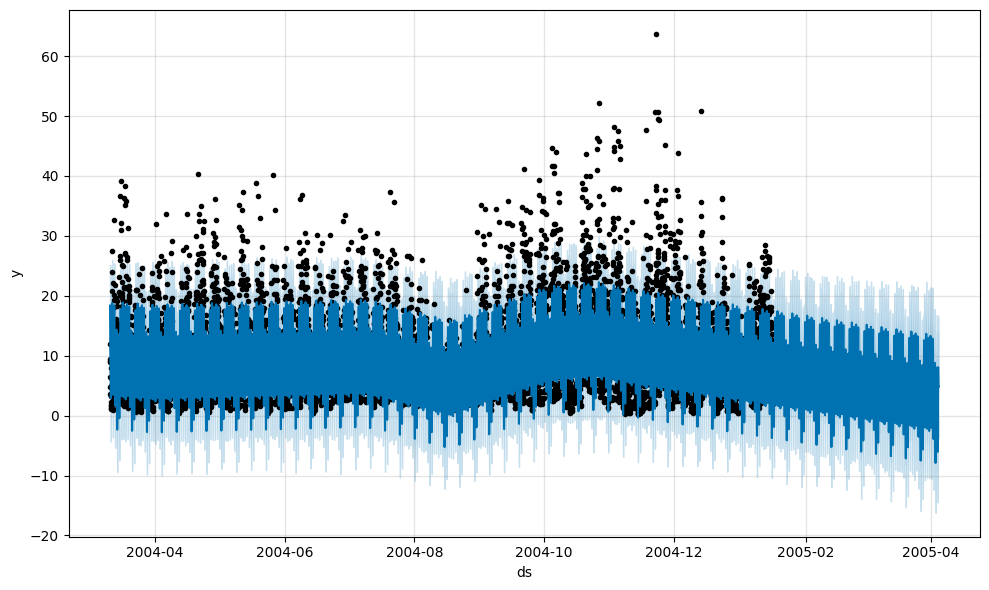

In [656]:
fig1=model.plot(forecast)

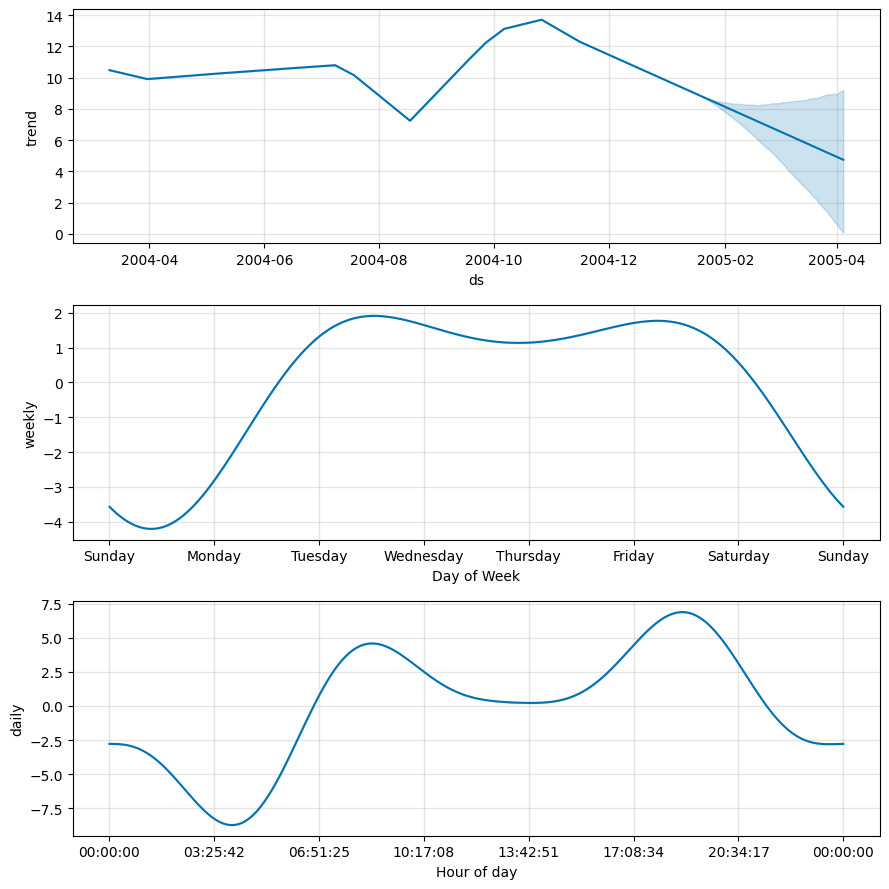

In [657]:
fig2=model.plot_components(forecast)

In [658]:
joblib.dump(model, "prophet_C6H6_model.pkl")

['prophet_C6H6_model.pkl']

#### FORECASTING FOR C6H6(GT)

In [659]:
# Forecast for next 2500 hours
future = model.make_future_dataframe(periods=2500, freq="h")
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(20)

ds      yhat  yhat_lower  yhat_upper
9965 2005-04-29 23:00:00  1.395202   -8.237125   10.718515
9966 2005-04-30 00:00:00  1.163206   -8.862325   10.927181
9967 2005-04-30 01:00:00  0.620189   -9.045634    9.598403
9968 2005-04-30 02:00:00 -1.301176  -11.217197    8.172879
9969 2005-04-30 03:00:00 -3.963567  -14.255073    6.045587
9970 2005-04-30 04:00:00 -5.410192  -15.085338    4.651600
9971 2005-04-30 05:00:00 -4.064671  -13.748097    5.314395
9972 2005-04-30 06:00:00 -0.202472   -9.637631    9.144230
9973 2005-04-30 07:00:00  4.146488   -5.678921   13.988233
9974 2005-04-30 08:00:00  6.756461   -3.093223   16.699081
9975 2005-04-30 09:00:00  6.812302   -2.356125   16.518354
9976 2005-04-30 10:00:00  5.204064   -4.495789   14.406710
9977 2005-04-30 11:00:00  3.444765   -6.091404   12.147352
9978 2005-04-30 12:00:00  2.385252   -7.390487   11.740924
9979 2005-04-30 13:00:00  1.909934   -7.721828   11.705996
9980 2005-04-30 14:00:00  1.666781   -8.220244   11.013937
9981 2005-04-30 15:00:00  1.822730   -8.291162   10.869608
9982 2005-04-30 16:00:00  2.917793   -7.393405   12.096845
9983 2005-04-30 17:00:00  4.978139   -4.647601   14.693191
9984 2005-04-30 18:00:00  6.956268   -3.065305   16.564274

### FOR NOx(GT) FEATURE


In [660]:
data.head()

ds     y
0 2004-03-10 18:00:00  11.9
1 2004-03-10 19:00:00   9.4
2 2004-03-10 20:00:00   9.0
3 2004-03-10 21:00:00   9.2
4 2004-03-10 22:00:00   6.5

In [661]:
data['y']=air_quality_data['NOx(GT)']

In [662]:
data.head()

ds      y
0 2004-03-10 18:00:00  166.0
1 2004-03-10 19:00:00  103.0
2 2004-03-10 20:00:00  131.0
3 2004-03-10 21:00:00  172.0
4 2004-03-10 22:00:00  131.0

In [663]:
train_size=int(len(data)*0.8)
train=data[:train_size]
test=data[train_size:]

In [664]:
print(train)
print(test)

                      ds      y
0    2004-03-10 18:00:00  166.0
1    2004-03-10 19:00:00  103.0
2    2004-03-10 20:00:00  131.0
3    2004-03-10 21:00:00  172.0
4    2004-03-10 22:00:00  131.0
...                  ...    ...
7480 2005-01-16 10:00:00  172.0
7481 2005-01-16 11:00:00  138.0
7482 2005-01-16 12:00:00  121.0
7483 2005-01-16 13:00:00  143.0
7484 2005-01-16 14:00:00  114.0

[7485 rows x 2 columns]
                      ds      y
7485 2005-01-16 15:00:00  107.0
7486 2005-01-16 16:00:00  176.0
7487 2005-01-16 17:00:00  180.0
7488 2005-01-16 18:00:00  212.0
7489 2005-01-16 19:00:00  331.0
...                  ...    ...
9352 2005-04-04 10:00:00  472.0
9353 2005-04-04 11:00:00  353.0
9354 2005-04-04 12:00:00  293.0
9355 2005-04-04 13:00:00  235.0
9356 2005-04-04 14:00:00  265.0

[1872 rows x 2 columns]


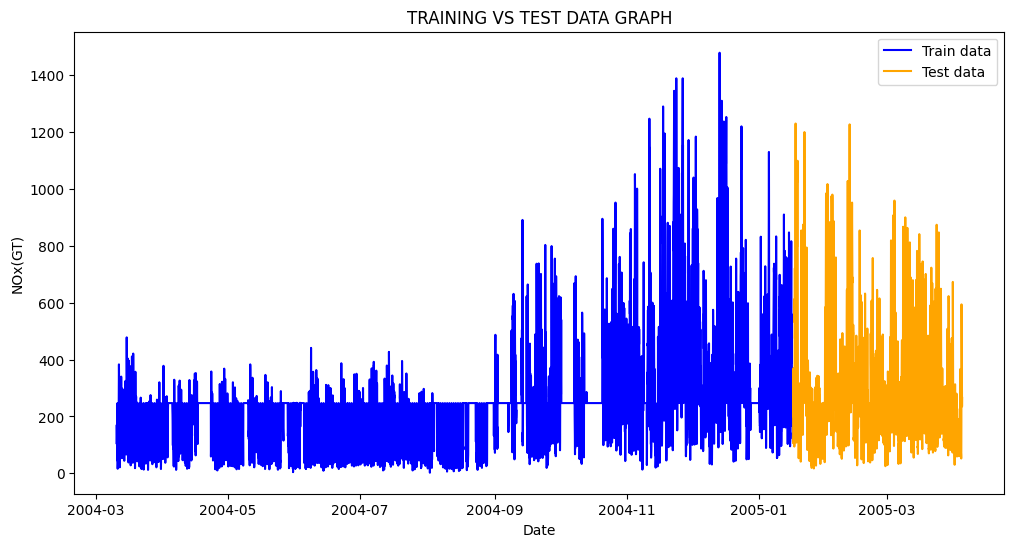

In [665]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.title("TRAINING VS TEST DATA GRAPH")
plt.xlabel("Date")
plt.ylabel("NOx(GT)")
plt.plot(train['ds'],train['y'],label="Train data" ,color="blue")
plt.plot(test['ds'],test['y'],label="Test data",color="orange")
plt.legend()
plt.show()

In [666]:
from prophet import Prophet
model=Prophet()
model.fit(train)

20:20:26 - cmdstanpy - INFO - Chain [1] start processing
20:20:28 - cmdstanpy - INFO - Chain [1] done processing


In [667]:
future=model.make_future_dataframe(periods=len(test),freq='h')
forecast=model.predict(future)
pred=forecast[['ds','yhat']].set_index('ds').loc[test['ds']]


In [668]:
print(future)
print(forecast)
print(pred)

                      ds
0    2004-03-10 18:00:00
1    2004-03-10 19:00:00
2    2004-03-10 20:00:00
3    2004-03-10 21:00:00
4    2004-03-10 22:00:00
...                  ...
9352 2005-04-04 10:00:00
9353 2005-04-04 11:00:00
9354 2005-04-04 12:00:00
9355 2005-04-04 13:00:00
9356 2005-04-04 14:00:00

[9357 rows x 1 columns]
                      ds       trend  yhat_lower  yhat_upper  trend_lower  \
0    2004-03-10 18:00:00  156.034500   90.138036  428.389027   156.034500   
1    2004-03-10 19:00:00  156.042404   80.574441  444.233832   156.042404   
2    2004-03-10 20:00:00  156.050308   76.052520  421.374636   156.050308   
3    2004-03-10 21:00:00  156.058212   23.629061  379.393509   156.058212   
4    2004-03-10 22:00:00  156.066116  -10.569858  341.959315   156.066116   
...                  ...         ...         ...         ...          ...   
9352 2005-04-04 10:00:00  350.309938  218.608971  605.794326   264.076586   
9353 2005-04-04 11:00:00  350.292078  195.738998  573.28900

**CHECKING ACCURACY FOR NOx(GT)**

In [669]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_actual=test['y'].values
y_predict=pred['yhat'].values

In [670]:
print(y_actual)
print(y_predict)

[107. 176. 180. ... 293. 235. 265.]
[336.00990317 354.87382042 380.49677328 ... 354.51066746 340.47322006
 342.51427934]


In [671]:
# Metrics
mae = mean_absolute_error(y_actual, y_predict)   # Avg error in same units as NOx(GT)
rmse = np.sqrt(mean_squared_error(y_actual, y_predict))  # Penalizes large errors
smape = 100 * np.mean(np.abs(y_actual - y_predict) / ((np.abs(y_actual) + np.abs(y_predict)) / 2)) 

print(f"MAE  (Mean Absolute Error): {mae:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")

print(f"SMAPE (Symmetric Mean Absolute % Error): {smape:.2f}%")

MAE  (Mean Absolute Error): 154.92
RMSE (Root Mean Squared Error): 186.52
SMAPE (Symmetric Mean Absolute % Error): 52.26%


- MAE (154.92): On average, predictions are off by ~155 units from actual values.

- RMSE (186.52): Errors are sometimes much larger, showing outliers or big misses.

- SMAPE (52.26%): Predictions deviate by ~52% from actual values, indicating low model accuracy.

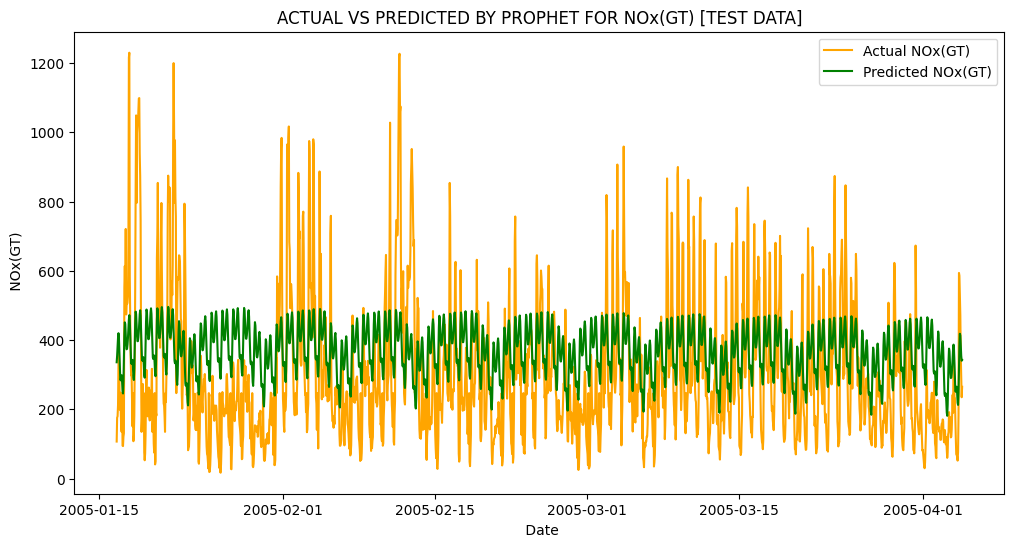

In [672]:
plt.figure(figsize=(12,6))
plt.title("ACTUAL VS PREDICTED BY PROPHET FOR NOx(GT) [TEST DATA]")
plt.plot(test['ds'],test['y'], label="Actual NOx(GT)" ,color="orange")
plt.plot(test['ds'],pred['yhat'], label="Predicted NOx(GT)" ,color="green")
plt.xlabel(" Date")
plt.ylabel(" NOx(GT)")
plt.legend()
plt.show()

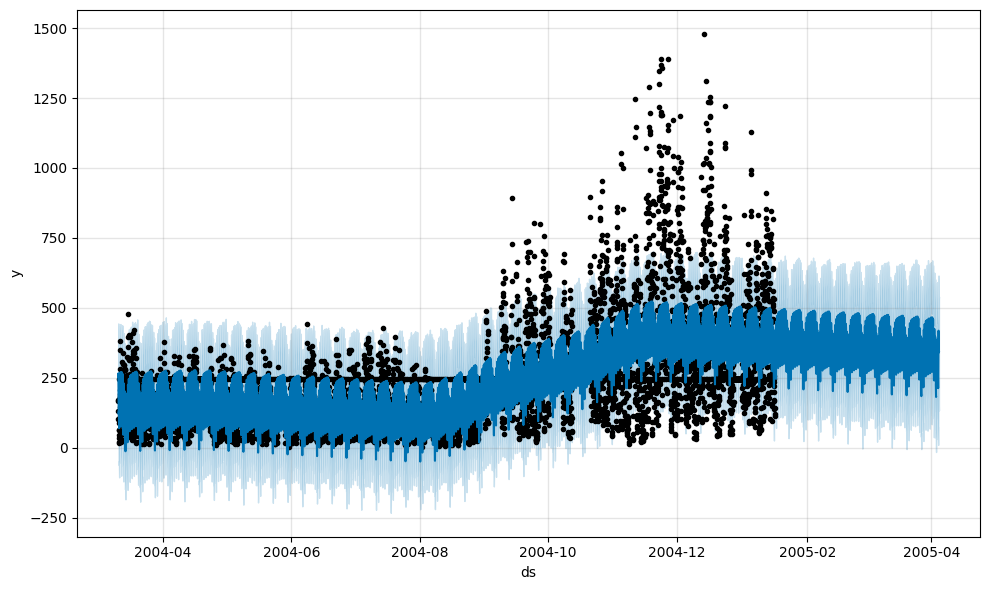

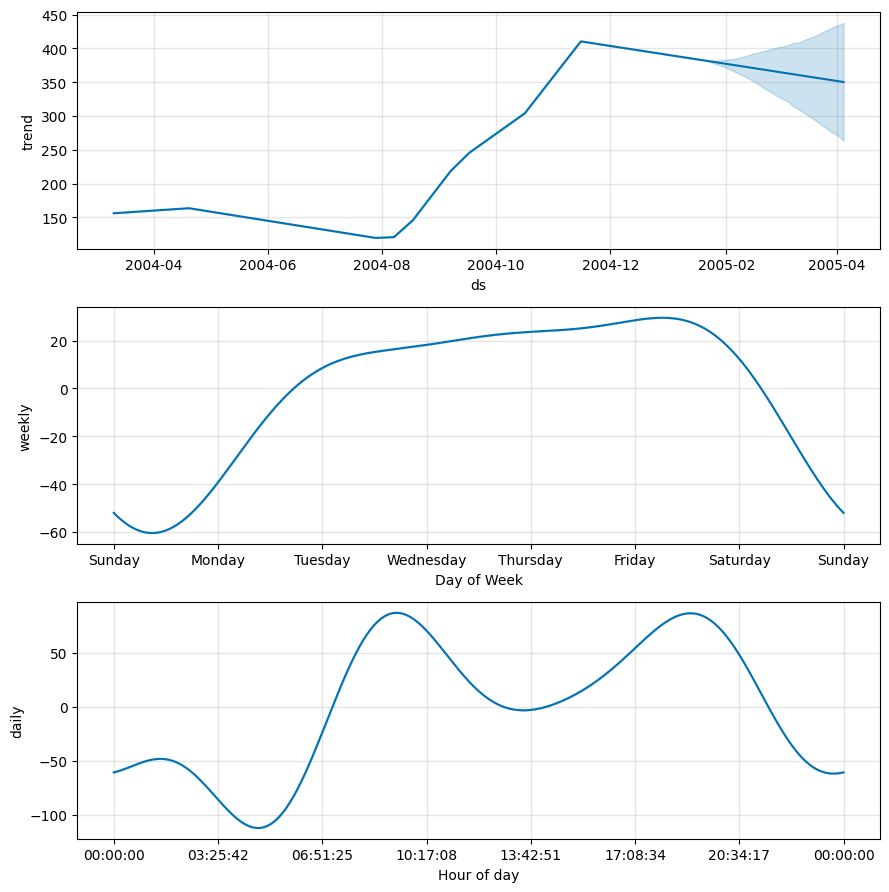

In [673]:
fig1=model.plot(forecast)
fig2=model.plot_components(forecast)

In [674]:
joblib.dump(model, "prophet_NOx(GT)_model.pkl")

['prophet_NOx(GT)_model.pkl']

#### FORECASTING OF NOx(GT)

In [675]:
future=model.make_future_dataframe(periods=2500,freq='h')
forecast=model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(20)

ds        yhat  yhat_lower  yhat_upper
9965 2005-04-29 23:00:00  298.031568   81.115312  531.039035
9966 2005-04-30 00:00:00  291.133093   58.186555  526.383768
9967 2005-04-30 01:00:00  298.795037   73.525642  524.399747
9968 2005-04-30 02:00:00  296.561303   82.899346  521.721009
9969 2005-04-30 03:00:00  272.376346   42.265871  496.635717
9970 2005-04-30 04:00:00  239.959241    6.864287  473.700945
9971 2005-04-30 05:00:00  228.734436  -16.378170  450.978754
9972 2005-04-30 06:00:00  258.349604   20.046086  472.324760
9973 2005-04-30 07:00:00  320.183283   77.352777  528.025000
9974 2005-04-30 08:00:00  382.211642  138.660445  615.124718
9975 2005-04-30 09:00:00  412.793035  180.067504  640.057397
9976 2005-04-30 10:00:00  402.723424  168.751527  626.114555
9977 2005-04-30 11:00:00  367.890343  134.398648  595.302314
9978 2005-04-30 12:00:00  333.168227   87.167716  555.184564
9979 2005-04-30 13:00:00  313.982595   79.572059  552.564979
9980 2005-04-30 14:00:00  310.985524   86.106242  540.873619
9981 2005-04-30 15:00:00  318.308861   66.103862  550.384093
9982 2005-04-30 16:00:00  332.901739  103.367714  554.071119
9983 2005-04-30 17:00:00  354.154620  132.724494  552.895288
9984 2005-04-30 18:00:00  376.171253  151.692846  597.952593

### FOR PT08.S4(NO2) FEATURE

In [676]:
data.head()

ds      y
0 2004-03-10 18:00:00  166.0
1 2004-03-10 19:00:00  103.0
2 2004-03-10 20:00:00  131.0
3 2004-03-10 21:00:00  172.0
4 2004-03-10 22:00:00  131.0

In [677]:
data['y']=air_quality_data['PT08.S4(NO2)']

In [678]:
data.head()

ds       y
0 2004-03-10 18:00:00  1692.0
1 2004-03-10 19:00:00  1559.0
2 2004-03-10 20:00:00  1555.0
3 2004-03-10 21:00:00  1584.0
4 2004-03-10 22:00:00  1490.0

In [679]:
train_size=int(len(data)*0.8)
train=data[:train_size]
test=data[train_size:]
print(train)
print(test)

                      ds       y
0    2004-03-10 18:00:00  1692.0
1    2004-03-10 19:00:00  1559.0
2    2004-03-10 20:00:00  1555.0
3    2004-03-10 21:00:00  1584.0
4    2004-03-10 22:00:00  1490.0
...                  ...     ...
7480 2005-01-16 10:00:00   846.0
7481 2005-01-16 11:00:00   847.0
7482 2005-01-16 12:00:00   824.0
7483 2005-01-16 13:00:00   857.0
7484 2005-01-16 14:00:00   809.0

[7485 rows x 2 columns]
                      ds       y
7485 2005-01-16 15:00:00   821.0
7486 2005-01-16 16:00:00   859.0
7487 2005-01-16 17:00:00   872.0
7488 2005-01-16 18:00:00   893.0
7489 2005-01-16 19:00:00   977.0
...                  ...     ...
9352 2005-04-04 10:00:00  1374.0
9353 2005-04-04 11:00:00  1264.0
9354 2005-04-04 12:00:00  1241.0
9355 2005-04-04 13:00:00  1041.0
9356 2005-04-04 14:00:00  1129.0

[1872 rows x 2 columns]


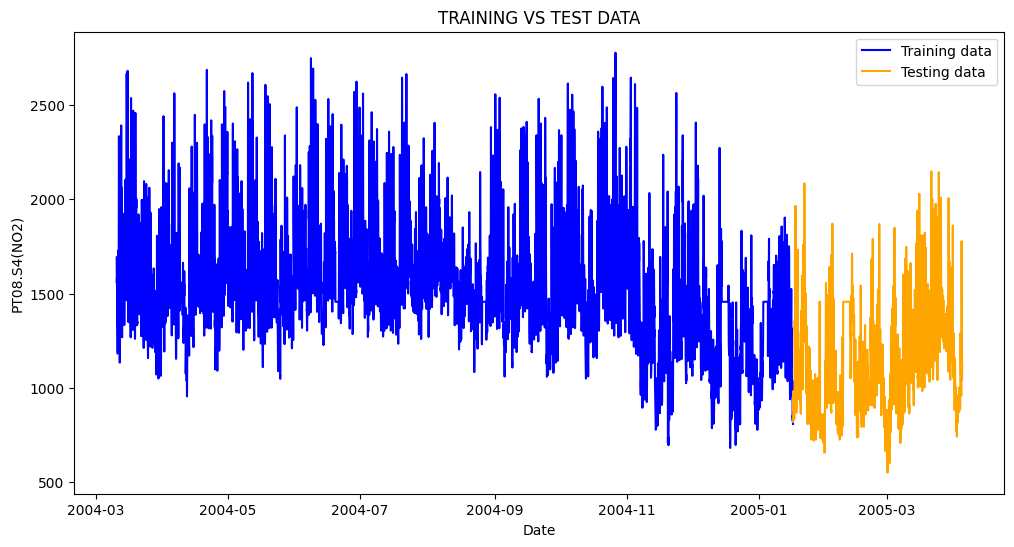

In [680]:
plt.figure(figsize=(12,6))
plt.title("TRAINING VS TEST DATA")
plt.plot(train['ds'],train['y'],label="Training data",color="blue")
plt.plot(test['ds'],test['y'],label="Testing data",color="orange")
plt.xlabel("Date")
plt.ylabel("PT08.S4(NO2)")
plt.legend()
plt.show()

In [681]:
from prophet import Prophet
model=Prophet()
model.fit(train)

20:20:34 - cmdstanpy - INFO - Chain [1] start processing
20:20:35 - cmdstanpy - INFO - Chain [1] done processing


In [682]:
future=model.make_future_dataframe(periods=len(test),freq='h')
forecast=model.predict(future)
pred=forecast[['ds','yhat']].set_index('ds').loc[test['ds']]
print(pred.tail())

                            yhat
ds                              
2005-04-04 10:00:00  1199.096870
2005-04-04 11:00:00  1137.754097
2005-04-04 12:00:00  1107.006757
2005-04-04 13:00:00  1100.850452
2005-04-04 14:00:00  1102.706282


**CHECKING ACCURACY FOR PT08.S4(NO2)**

In [683]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_actual=test['y'].values
y_predict=pred['yhat'].values


In [684]:
print(y_actual)
print(y_predict)

[ 821.  859.  872. ... 1241. 1041. 1129.]
[1091.46350294 1132.85977063 1211.37424741 ... 1107.00675743 1100.85045243
 1102.7062822 ]


In [685]:
print(y_actual.shape)
print(y_predict.shape)

(1872,)
(1872,)


In [686]:
# Metrics
mae = mean_absolute_error(y_actual, y_predict)   # Avg error in same units 
rmse = np.sqrt(mean_squared_error(y_actual, y_predict))  # Penalizes large errors
mape = np.mean(np.abs((y_actual - y_predict) / y_actual)) * 100  # % error

print(f"MAE  (Mean Absolute Error): {mae:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"MAPE (Mean Absolute % Error): {mape:.2f}%")

MAE  (Mean Absolute Error): 215.36
RMSE (Root Mean Squared Error): 260.73
MAPE (Mean Absolute % Error): 20.87%


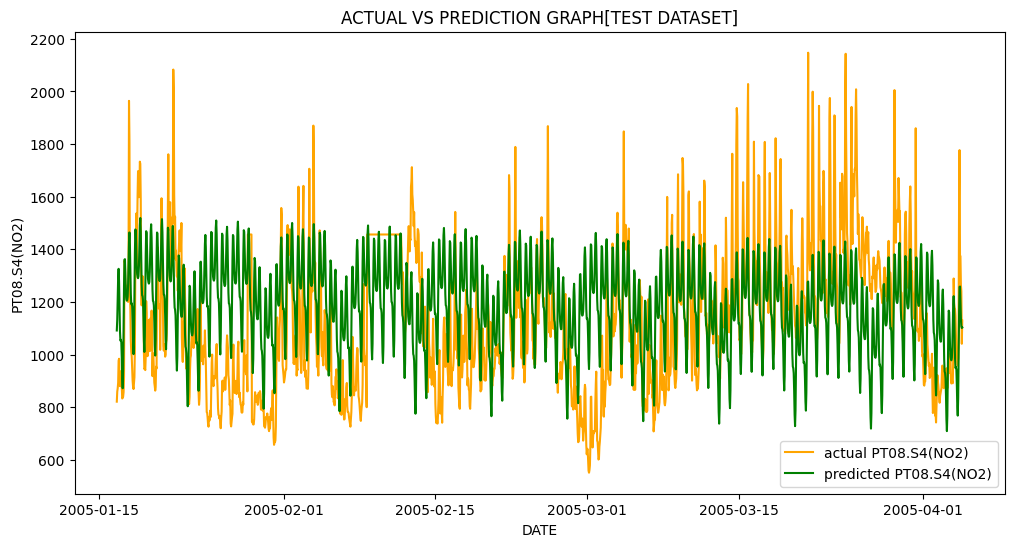

In [687]:
plt.figure(figsize=(12,6))
plt.title("ACTUAL VS PREDICTION GRAPH[TEST DATASET]")
plt.plot(test['ds'],test['y'],label="actual PT08.S4(NO2)",color="orange")
plt.plot(test['ds'],pred['yhat'],label="predicted PT08.S4(NO2)",color="green")
plt.xlabel("DATE")
plt.ylabel("PT08.S4(NO2)")
plt.legend()
plt.show()

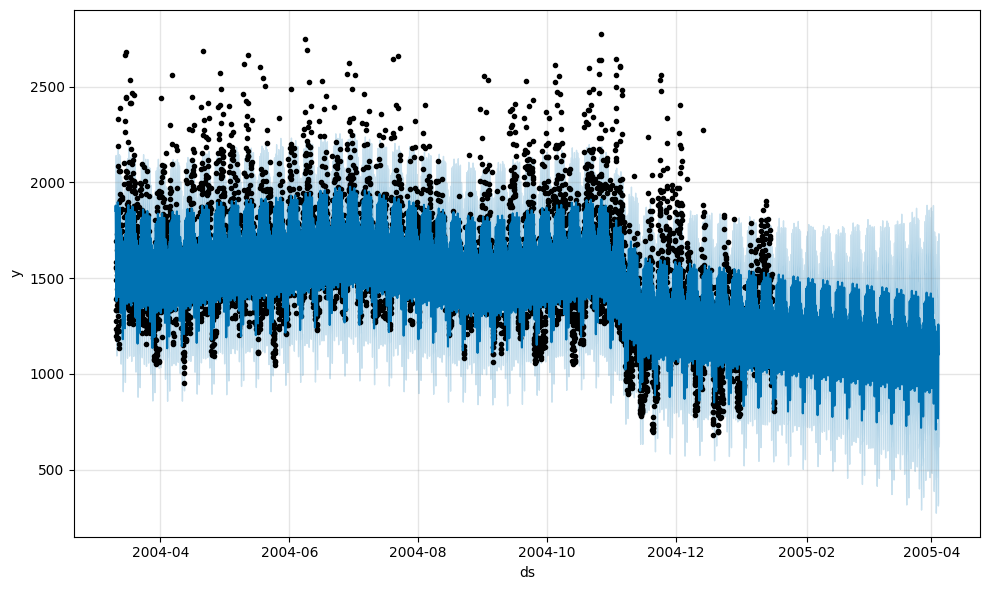

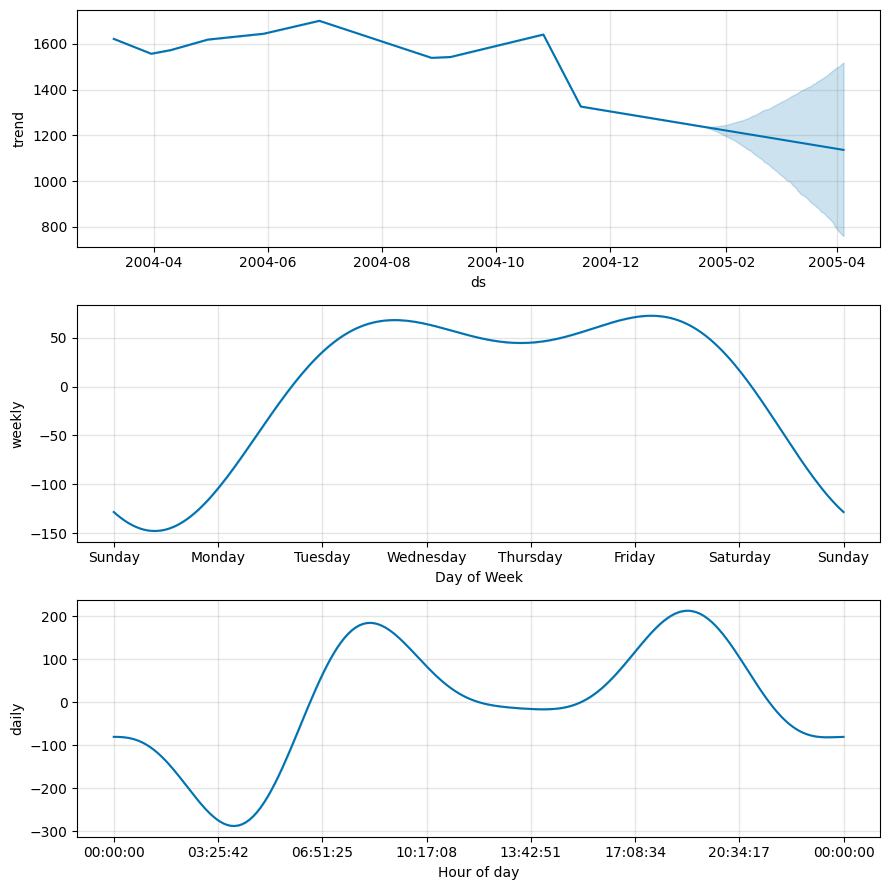

In [688]:
fig1=model.plot(forecast)
fig2=model.plot_components(forecast)

#### FORECASTING FOR PT08.S4(NO2)

In [689]:
future=model.make_future_dataframe(periods=2500,freq='h')
forecast=model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(20)

ds         yhat  yhat_lower   yhat_upper
9965 2005-04-29 23:00:00  1045.932262  377.907023  1693.514976
9966 2005-04-30 00:00:00  1038.341812  381.120084  1665.330607
9967 2005-04-30 01:00:00  1017.361242  375.984960  1650.039503
9968 2005-04-30 02:00:00   947.582988  313.025739  1573.886968
9969 2005-04-30 03:00:00   853.878760  192.692838  1485.856018
9970 2005-04-30 04:00:00   806.818653  197.174169  1448.328065
9971 2005-04-30 05:00:00   861.313811  224.555883  1532.793647
9972 2005-04-30 06:00:00  1004.177438  365.582276  1652.309822
9973 2005-04-30 07:00:00  1159.035050  511.986650  1814.013830
9974 2005-04-30 08:00:00  1244.336438  577.591450  1914.339013
9975 2005-04-30 09:00:00  1232.454710  596.827360  1853.625100
9976 2005-04-30 10:00:00  1159.750639  511.100917  1818.038540
9977 2005-04-30 11:00:00  1085.199252  444.731783  1731.482250
9978 2005-04-30 12:00:00  1041.329507  418.706874  1688.645356
9979 2005-04-30 13:00:00  1022.188898  354.602096  1685.893197
9980 2005-04-30 14:00:00  1011.249582  420.609338  1688.784651
9981 2005-04-30 15:00:00  1011.840875  373.566884  1669.108579
9982 2005-04-30 16:00:00  1044.286023  436.509033  1678.011980
9983 2005-04-30 17:00:00  1113.629223  459.058704  1753.743843
9984 2005-04-30 18:00:00  1186.634551  549.356432  1854.229895

successfully training testing and forecasting of feature PT08.S4(NO2)

### FOR PT08.S5(O3) FEATURE


In [690]:
data.head()

ds       y
0 2004-03-10 18:00:00  1692.0
1 2004-03-10 19:00:00  1559.0
2 2004-03-10 20:00:00  1555.0
3 2004-03-10 21:00:00  1584.0
4 2004-03-10 22:00:00  1490.0

In [691]:
data['y']=air_quality_data['PT08.S5(O3)']

In [692]:
data.head()

ds       y
0 2004-03-10 18:00:00  1268.0
1 2004-03-10 19:00:00   972.0
2 2004-03-10 20:00:00  1074.0
3 2004-03-10 21:00:00  1203.0
4 2004-03-10 22:00:00  1110.0

In [693]:
train_size=int(len(data)*0.8)
train=data[:train_size]
test=data[train_size:]
print(train)
print(test)

                      ds       y
0    2004-03-10 18:00:00  1268.0
1    2004-03-10 19:00:00   972.0
2    2004-03-10 20:00:00  1074.0
3    2004-03-10 21:00:00  1203.0
4    2004-03-10 22:00:00  1110.0
...                  ...     ...
7480 2005-01-16 10:00:00   687.0
7481 2005-01-16 11:00:00   597.0
7482 2005-01-16 12:00:00   527.0
7483 2005-01-16 13:00:00   573.0
7484 2005-01-16 14:00:00   492.0

[7485 rows x 2 columns]
                      ds       y
7485 2005-01-16 15:00:00   463.0
7486 2005-01-16 16:00:00   565.0
7487 2005-01-16 17:00:00   632.0
7488 2005-01-16 18:00:00   691.0
7489 2005-01-16 19:00:00   943.0
...                  ...     ...
9352 2005-04-04 10:00:00  1729.0
9353 2005-04-04 11:00:00  1269.0
9354 2005-04-04 12:00:00  1092.0
9355 2005-04-04 13:00:00   770.0
9356 2005-04-04 14:00:00   816.0

[1872 rows x 2 columns]


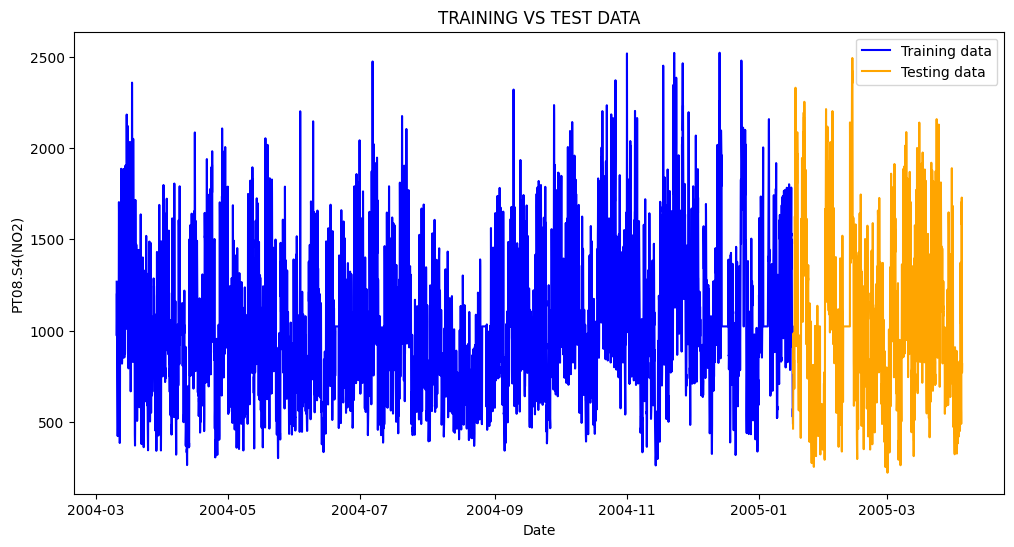

In [694]:
plt.figure(figsize=(12,6))
plt.title("TRAINING VS TEST DATA")
plt.plot(train['ds'],train['y'],label="Training data",color="blue")
plt.plot(test['ds'],test['y'],label="Testing data",color="orange")
plt.xlabel("Date")
plt.ylabel("PT08.S4(NO2)")
plt.legend()
plt.show()

In [695]:
from prophet import Prophet
model=Prophet()
model.fit(train)

20:20:42 - cmdstanpy - INFO - Chain [1] start processing
20:20:44 - cmdstanpy - INFO - Chain [1] done processing


In [696]:
future=model.make_future_dataframe(periods=len(test),freq='h')
forecast=model.predict(future)
pred=forecast[['ds','yhat']].set_index('ds').loc[test['ds']]
print(pred.tail())

                            yhat
ds                              
2005-04-04 10:00:00  1255.228819
2005-04-04 11:00:00  1176.734731
2005-04-04 12:00:00  1104.354800
2005-04-04 13:00:00  1053.966695
2005-04-04 14:00:00  1029.541732


#### checking accuracy for PT08.S5(O3) (Ozone sensor)

In [697]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_actual=test['y'].values
y_predict=pred['yhat'].values

In [698]:
mae = mean_absolute_error(y_actual, y_predict)   # Avg error in same units 
rmse = np.sqrt(mean_squared_error(y_actual, y_predict))  # Penalizes large errors
mape = np.mean(np.abs((y_actual - y_predict) / y_actual)) * 100  # % error

print(f"MAE  (Mean Absolute Error): {mae:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"MAPE (Mean Absolute % Error): {mape:.2f}%")

MAE  (Mean Absolute Error): 330.10
RMSE (Root Mean Squared Error): 403.73
MAPE (Mean Absolute % Error): 45.82%


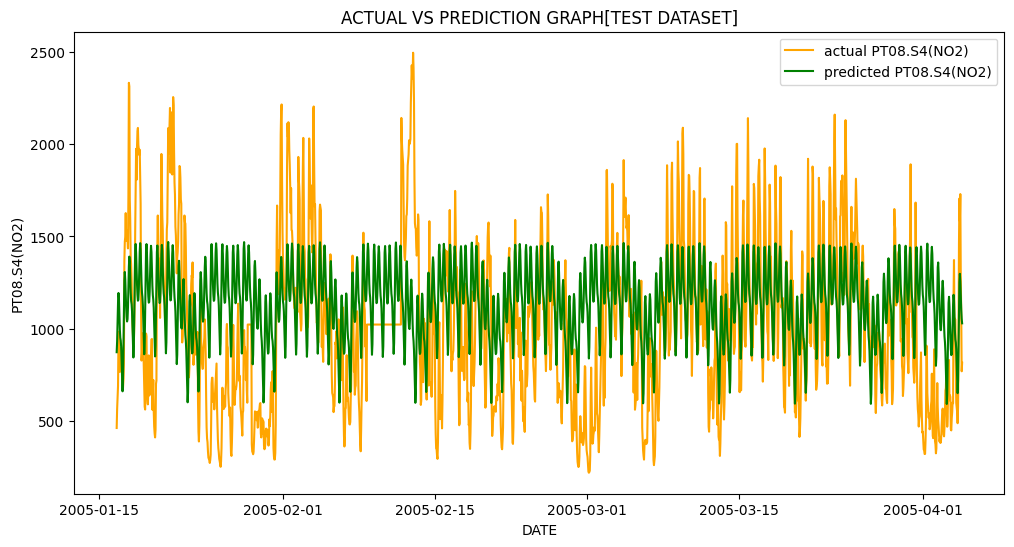

In [699]:
plt.figure(figsize=(12,6))
plt.title("ACTUAL VS PREDICTION GRAPH[TEST DATASET]")
plt.plot(test['ds'],test['y'],label="actual PT08.S4(NO2)",color="orange")
plt.plot(test['ds'],pred['yhat'],label="predicted PT08.S4(NO2)",color="green")
plt.xlabel("DATE")
plt.ylabel("PT08.S4(NO2)")
plt.legend()
plt.show()

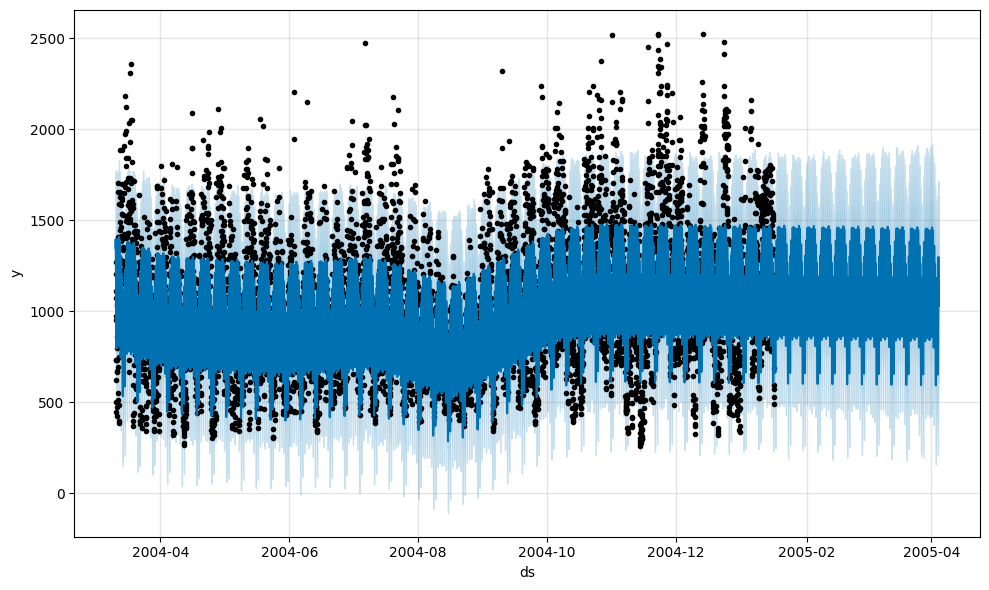

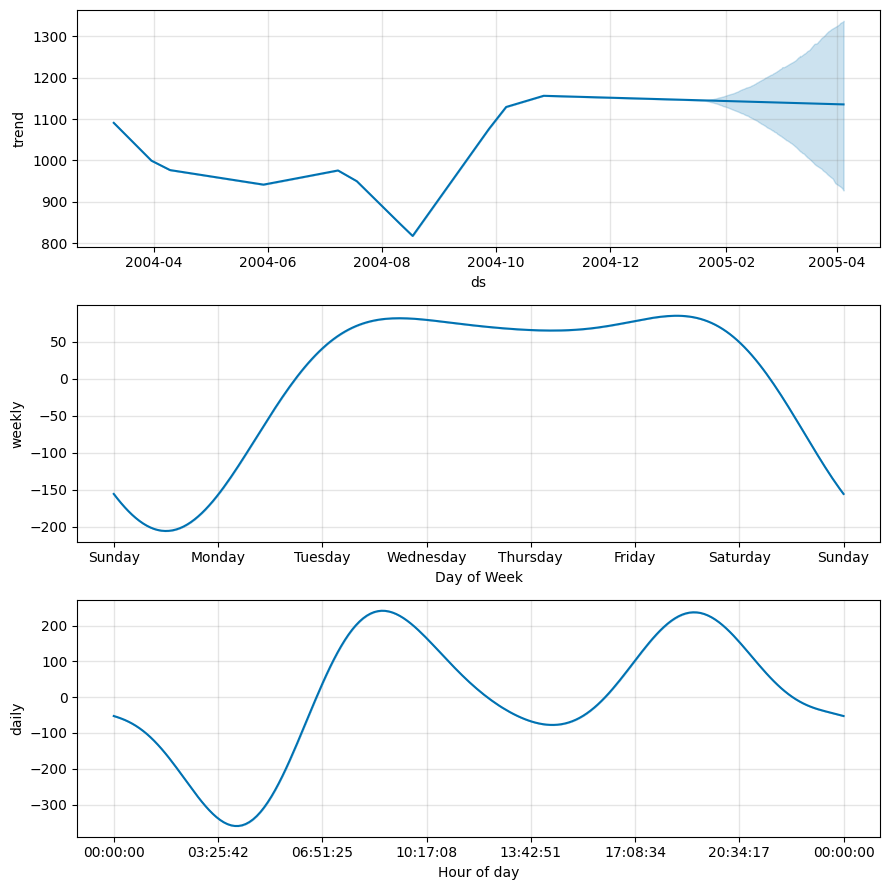

In [700]:
fig1=model.plot(forecast)
fig2=model.plot_components(forecast)

#### FORECASTING FOR PT08.S5(O3) (Ozone sensor)

In [701]:
future=model.make_future_dataframe(periods=2500,freq='h')
forecast=model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(20)

ds         yhat  yhat_lower   yhat_upper
9965 2005-04-29 23:00:00  1157.430061  667.569461  1631.096431
9966 2005-04-30 00:00:00  1128.740240  624.846844  1655.048528
9967 2005-04-30 01:00:00  1079.046748  599.376535  1580.474116
9968 2005-04-30 02:00:00   979.541601  440.353931  1517.078893
9969 2005-04-30 03:00:00   860.292067  356.519492  1384.104776
9970 2005-04-30 04:00:00   796.066748  240.061560  1272.089640
9971 2005-04-30 05:00:00   847.005063  355.530465  1367.326728
9972 2005-04-30 06:00:00  1005.508034  504.243023  1482.468897
9973 2005-04-30 07:00:00  1196.123575  676.061763  1692.308269
9974 2005-04-30 08:00:00  1328.122548  804.739829  1837.085055
9975 2005-04-30 09:00:00  1355.195490  829.616918  1851.368351
9976 2005-04-30 10:00:00  1294.500018  754.373243  1788.539990
9977 2005-04-30 11:00:00  1197.390592  681.236415  1705.500470
9978 2005-04-30 12:00:00  1106.306591  591.395905  1624.334734
9979 2005-04-30 13:00:00  1037.210184  498.998392  1582.238185
9980 2005-04-30 14:00:00   994.157046  482.417922  1487.425661
9981 2005-04-30 15:00:00   988.455034  486.903883  1524.958925
9982 2005-04-30 16:00:00  1034.386068  530.803570  1558.842531
9983 2005-04-30 17:00:00  1124.793082  597.650175  1649.745364
9984 2005-04-30 18:00:00  1217.492040  700.175822  1704.723324

successfully training testing and forecasting of feature PT08.S5(O3) (Ozone sensor)

### FOR NO2(GT) FEATURE

In [702]:
data.head()

ds       y
0 2004-03-10 18:00:00  1268.0
1 2004-03-10 19:00:00   972.0
2 2004-03-10 20:00:00  1074.0
3 2004-03-10 21:00:00  1203.0
4 2004-03-10 22:00:00  1110.0

In [703]:
data['y']=air_quality_data['NO2(GT)']

In [704]:
data.head()

ds      y
0 2004-03-10 18:00:00  113.0
1 2004-03-10 19:00:00   92.0
2 2004-03-10 20:00:00  114.0
3 2004-03-10 21:00:00  122.0
4 2004-03-10 22:00:00  116.0

In [705]:
train_size=int(len(data)*0.8)
train=data[:train_size]
test=data[train_size:]
print(train)
print(test)

                      ds      y
0    2004-03-10 18:00:00  113.0
1    2004-03-10 19:00:00   92.0
2    2004-03-10 20:00:00  114.0
3    2004-03-10 21:00:00  122.0
4    2004-03-10 22:00:00  116.0
...                  ...    ...
7480 2005-01-16 10:00:00  112.0
7481 2005-01-16 11:00:00   96.0
7482 2005-01-16 12:00:00   89.0
7483 2005-01-16 13:00:00   98.0
7484 2005-01-16 14:00:00   85.0

[7485 rows x 2 columns]
                      ds      y
7485 2005-01-16 15:00:00   80.0
7486 2005-01-16 16:00:00  112.0
7487 2005-01-16 17:00:00  121.0
7488 2005-01-16 18:00:00  132.0
7489 2005-01-16 19:00:00  160.0
...                  ...    ...
9352 2005-04-04 10:00:00  190.0
9353 2005-04-04 11:00:00  179.0
9354 2005-04-04 12:00:00  175.0
9355 2005-04-04 13:00:00  156.0
9356 2005-04-04 14:00:00  168.0

[1872 rows x 2 columns]


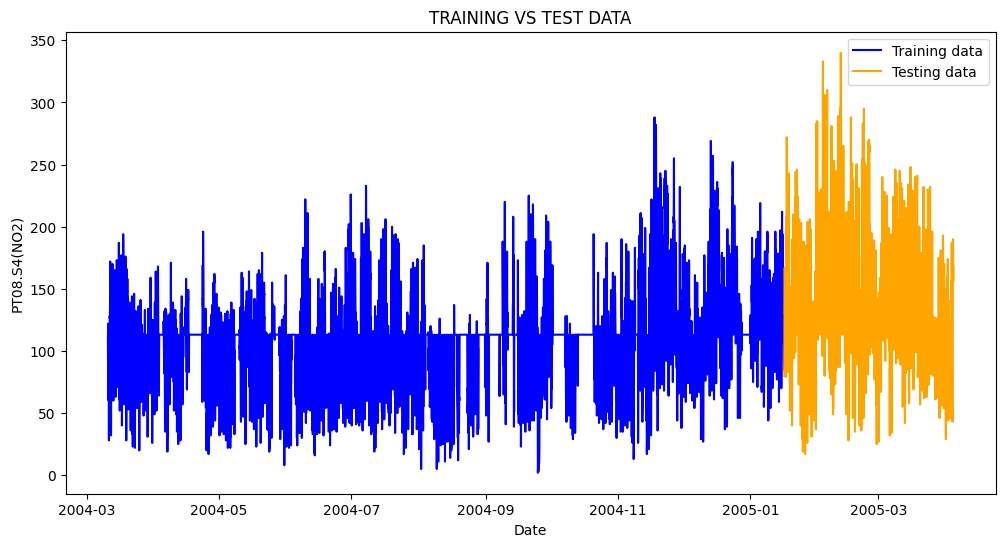

In [706]:
plt.figure(figsize=(12,6))
plt.title("TRAINING VS TEST DATA")
plt.plot(train['ds'],train['y'],label="Training data",color="blue")
plt.plot(test['ds'],test['y'],label="Testing data",color="orange")
plt.xlabel("Date")
plt.ylabel("PT08.S4(NO2)")
plt.legend()
plt.show()

In [707]:
from prophet import Prophet
model=Prophet()
model.fit(train)
future=model.make_future_dataframe(periods=len(test),freq='h')
forecast=model.predict(future)
pred=forecast[['ds','yhat']].set_index('ds').loc[test['ds']]
print(pred.tail())

20:20:50 - cmdstanpy - INFO - Chain [1] start processing
20:20:52 - cmdstanpy - INFO - Chain [1] done processing


                           yhat
ds                             
2005-04-04 10:00:00  166.308197
2005-04-04 11:00:00  163.568850
2005-04-04 12:00:00  158.595927
2005-04-04 13:00:00  155.603403
2005-04-04 14:00:00  156.175065


#### checking accuracy for NO2(GT)

In [708]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_actual=test['y'].values
y_predict=pred['yhat'].values
mae = mean_absolute_error(y_actual, y_predict)   # Avg error in same units 
rmse = np.sqrt(mean_squared_error(y_actual, y_predict))  # Penalizes large errors
mape = np.mean(np.abs((y_actual - y_predict) / y_actual)) * 100  # % error

print(f"MAE  (Mean Absolute Error): {mae:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"MAPE (Mean Absolute % Error): {mape:.2f}%")

MAE  (Mean Absolute Error): 35.38
RMSE (Root Mean Squared Error): 44.58
MAPE (Mean Absolute % Error): 32.45%


- MAE = 35.38: On average, predictions are off by 35.38 units of NO₂.

- RMSE = 44.58: Larger errors exist; extreme prediction errors pull RMSE higher than MAE.

- MAPE = 32.45%: Predictions are about 32% off relative to actual values, indicating moderate accuracy.

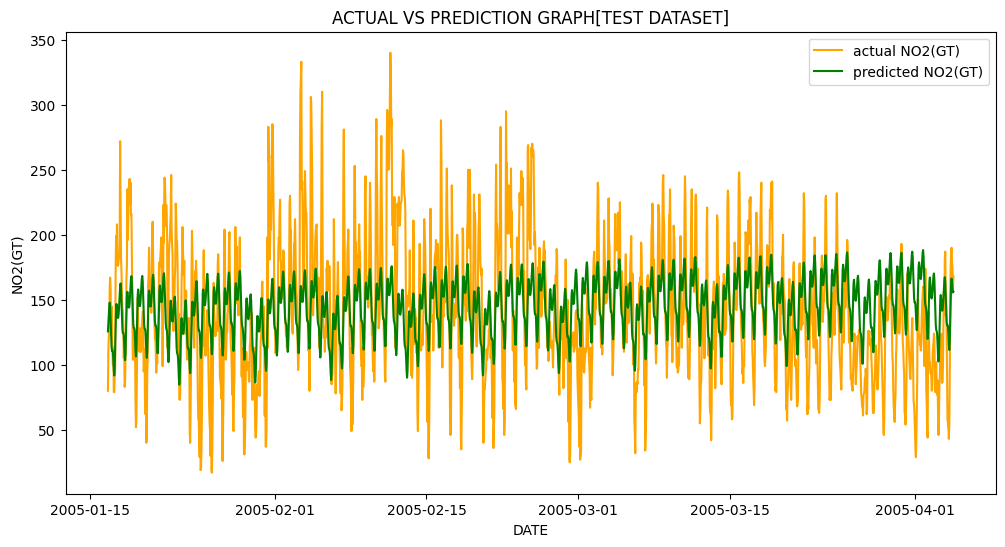

In [709]:
plt.figure(figsize=(12,6))
plt.title("ACTUAL VS PREDICTION GRAPH[TEST DATASET]")
plt.plot(test['ds'],test['y'],label="actual NO2(GT)",color="orange")
plt.plot(test['ds'],pred['yhat'],label="predicted NO2(GT)",color="green")
plt.xlabel("DATE")
plt.ylabel("NO2(GT)")
plt.legend()
plt.show()

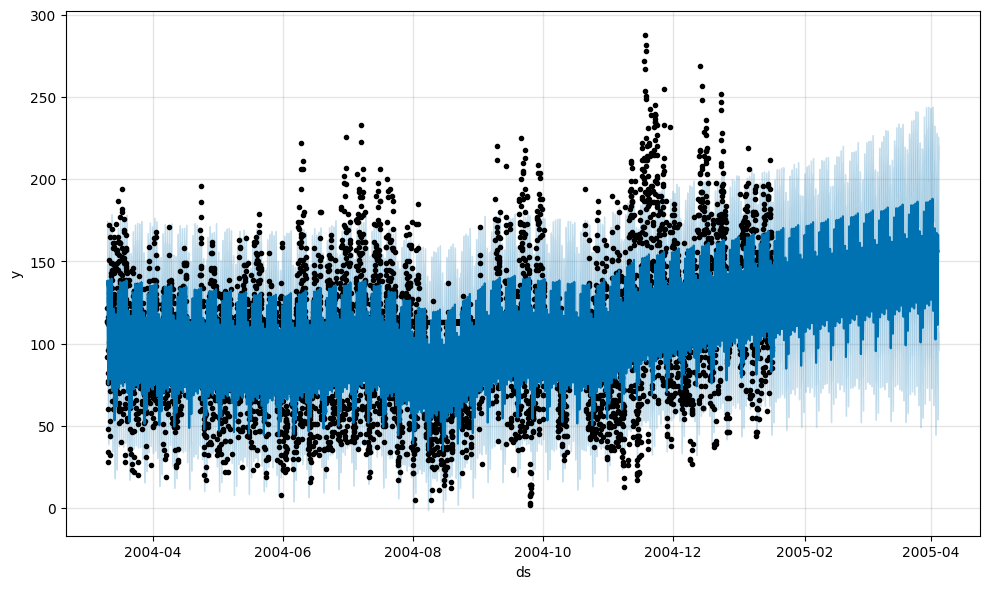

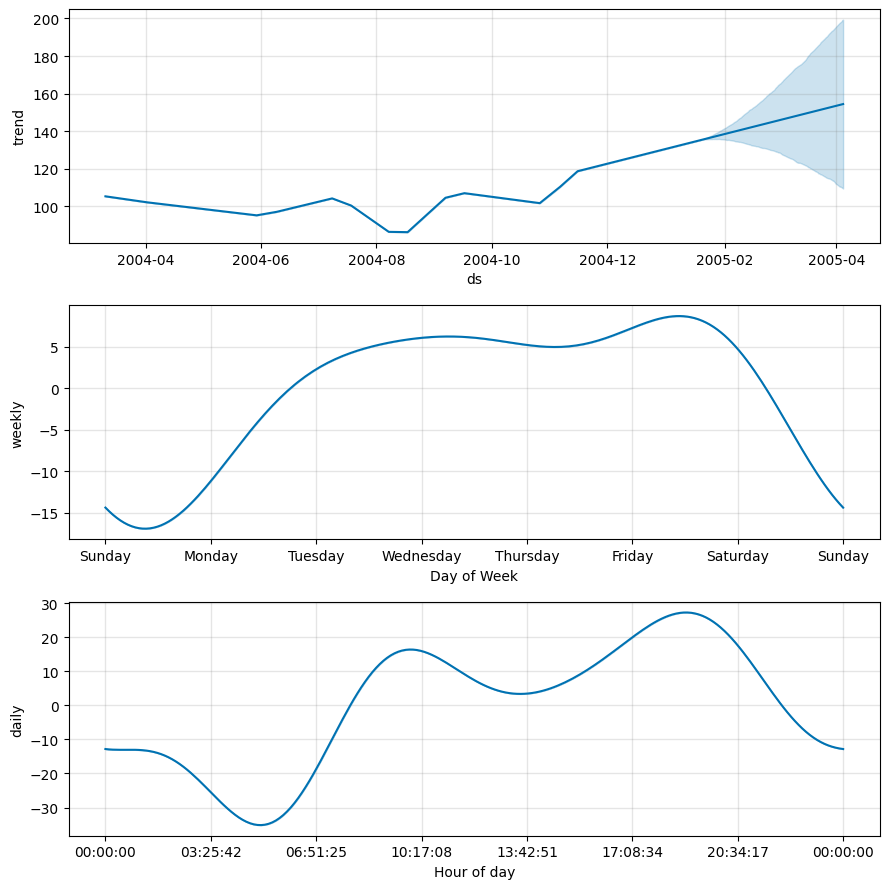

In [710]:
fig1=model.plot(forecast)
fig2=model.plot_components(forecast)

In [711]:
joblib.dump(model, "prophet_NO2(GT)_model.pkl")

['prophet_NO2(GT)_model.pkl']

#### forecasting for NO2(GT)

In [712]:
future=model.make_future_dataframe(periods=2500,freq='h')
forecast=model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(20)

ds        yhat  yhat_lower  yhat_upper
9965 2005-04-29 23:00:00  157.018690   80.677762  231.110362
9966 2005-04-30 00:00:00  152.855623   74.673413  228.568265
9967 2005-04-30 01:00:00  151.994561   76.081833  228.220777
9968 2005-04-30 02:00:00  149.360497   68.729180  226.558316
9969 2005-04-30 03:00:00  142.013670   68.968596  217.027245
9970 2005-04-30 04:00:00  132.412468   55.420592  206.702952
9971 2005-04-30 05:00:00  126.994249   50.335367  201.191329
9972 2005-04-30 06:00:00  131.044121   54.676737  207.751233
9973 2005-04-30 07:00:00  144.164467   68.888432  225.343031
9974 2005-04-30 08:00:00  160.188005   83.450243  242.358140
9975 2005-04-30 09:00:00  171.529883   98.384619  250.239006
9976 2005-04-30 10:00:00  174.273196   97.657361  255.833094
9977 2005-04-30 11:00:00  169.998925   93.281594  244.885531
9978 2005-04-30 12:00:00  163.505315   86.515995  243.180324
9979 2005-04-30 13:00:00  159.013074   81.422691  236.437619
9980 2005-04-30 14:00:00  158.112501   78.879887  233.809293
9981 2005-04-30 15:00:00  160.378855   77.102469  236.174350
9982 2005-04-30 16:00:00  164.914072   89.184525  244.417043
9983 2005-04-30 17:00:00  170.733202   90.924468  246.895926
9984 2005-04-30 18:00:00  175.918904   96.177731  248.788572

successfully training testing and forecasting of feature NO2(GT)

### FOR AH(ABSOLUTE HUMIDITY)

In [713]:
data.head()

ds      y
0 2004-03-10 18:00:00  113.0
1 2004-03-10 19:00:00   92.0
2 2004-03-10 20:00:00  114.0
3 2004-03-10 21:00:00  122.0
4 2004-03-10 22:00:00  116.0

In [714]:
data['y']=air_quality_data['AH']

In [715]:
data.head()

ds       y
0 2004-03-10 18:00:00  0.7578
1 2004-03-10 19:00:00  0.7255
2 2004-03-10 20:00:00  0.7502
3 2004-03-10 21:00:00  0.7867
4 2004-03-10 22:00:00  0.7888

In [716]:
train_size=int(len(data)*0.8)
train=data[:train_size]
test=data[train_size:]
print(train)
print(test)

                      ds       y
0    2004-03-10 18:00:00  0.7578
1    2004-03-10 19:00:00  0.7255
2    2004-03-10 20:00:00  0.7502
3    2004-03-10 21:00:00  0.7867
4    2004-03-10 22:00:00  0.7888
...                  ...     ...
7480 2005-01-16 10:00:00  0.4554
7481 2005-01-16 11:00:00  0.4406
7482 2005-01-16 12:00:00  0.4401
7483 2005-01-16 13:00:00  0.4285
7484 2005-01-16 14:00:00  0.4310

[7485 rows x 2 columns]
                      ds       y
7485 2005-01-16 15:00:00  0.4334
7486 2005-01-16 16:00:00  0.4331
7487 2005-01-16 17:00:00  0.4377
7488 2005-01-16 18:00:00  0.4542
7489 2005-01-16 19:00:00  0.4228
...                  ...     ...
9352 2005-04-04 10:00:00  0.7568
9353 2005-04-04 11:00:00  0.7119
9354 2005-04-04 12:00:00  0.6406
9355 2005-04-04 13:00:00  0.5139
9356 2005-04-04 14:00:00  0.5028

[1872 rows x 2 columns]


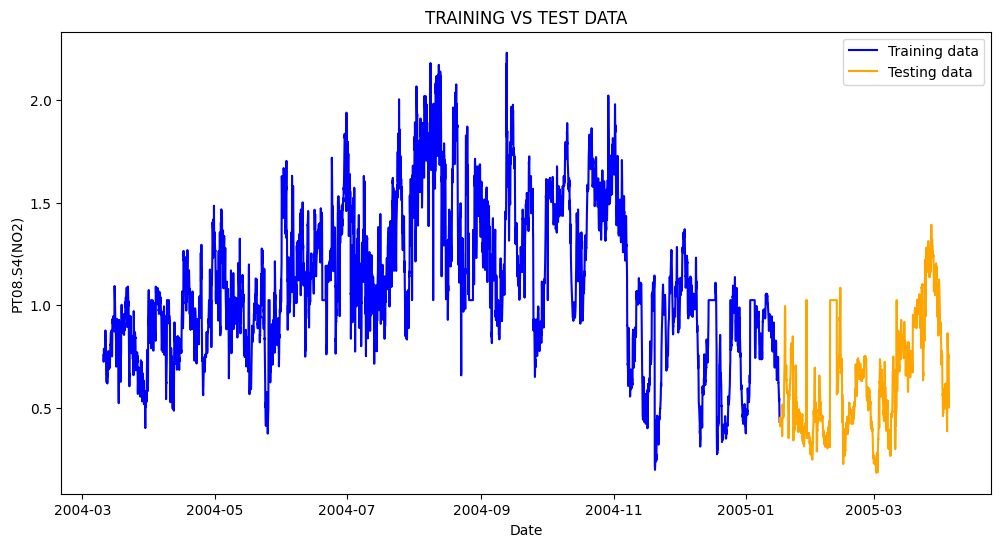

In [717]:
plt.figure(figsize=(12,6))
plt.title("TRAINING VS TEST DATA")
plt.plot(train['ds'],train['y'],label="Training data",color="blue")
plt.plot(test['ds'],test['y'],label="Testing data",color="orange")
plt.xlabel("Date")
plt.ylabel("PT08.S4(NO2)")
plt.legend()
plt.show()

In [718]:
from prophet import Prophet
model=Prophet()
model.fit(train)
future=model.make_future_dataframe(periods=len(test),freq='h')
forecast=model.predict(future)
pred=forecast[['ds','yhat']].set_index('ds').loc[test['ds']]
print(pred.tail())

20:20:58 - cmdstanpy - INFO - Chain [1] start processing
20:21:00 - cmdstanpy - INFO - Chain [1] done processing


                         yhat
ds                           
2005-04-04 10:00:00  0.573029
2005-04-04 11:00:00  0.557591
2005-04-04 12:00:00  0.540554
2005-04-04 13:00:00  0.526279
2005-04-04 14:00:00  0.517556


**checking accuracy for absolute humidity(AH)**

In [719]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_actual=test['y'].values
y_predict=pred['yhat'].values
mae = mean_absolute_error(y_actual, y_predict)   # Avg error in same units 
rmse = np.sqrt(mean_squared_error(y_actual, y_predict))  # Penalizes large errors
mape = np.mean(np.abs((y_actual - y_predict) / y_actual)) * 100  # % error

print(f"MAE  (Mean Absolute Error): {mae:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"MAPE (Mean Absolute % Error): {mape:.2f}%")

MAE  (Mean Absolute Error): 0.25
RMSE (Root Mean Squared Error): 0.29
MAPE (Mean Absolute % Error): 47.86%


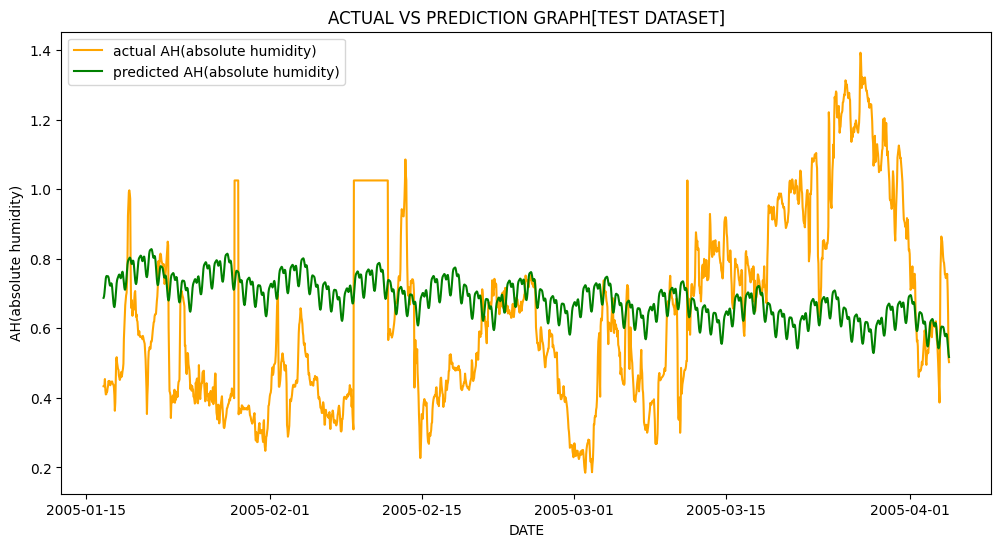

In [720]:
plt.figure(figsize=(12,6))
plt.title("ACTUAL VS PREDICTION GRAPH[TEST DATASET]")
plt.plot(test['ds'],test['y'],label="actual AH(absolute humidity)",color="orange")
plt.plot(test['ds'],pred['yhat'],label="predicted AH(absolute humidity)",color="green")
plt.xlabel("DATE")
plt.ylabel("AH(absolute humidity)")
plt.legend()
plt.show()

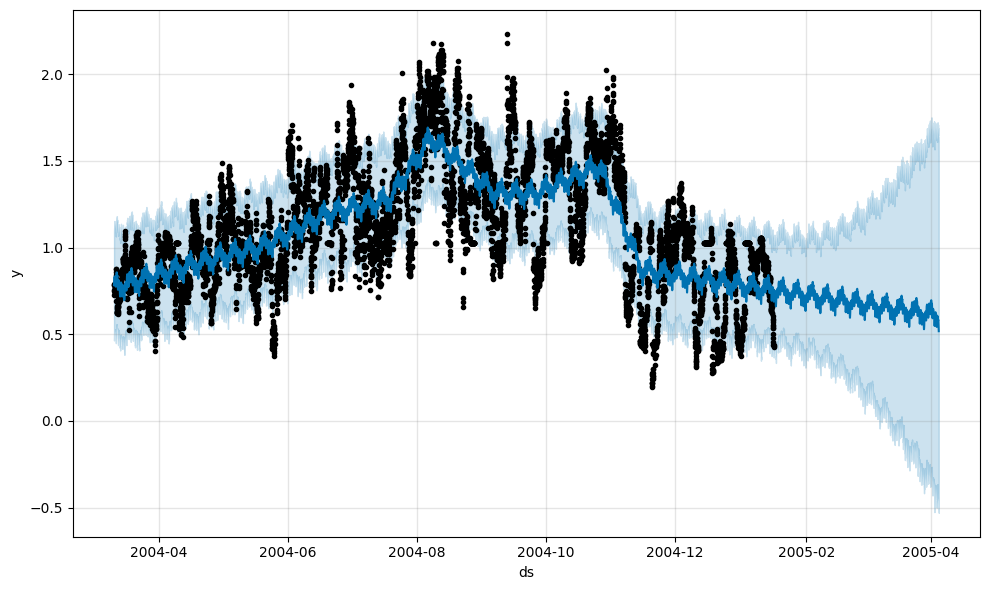

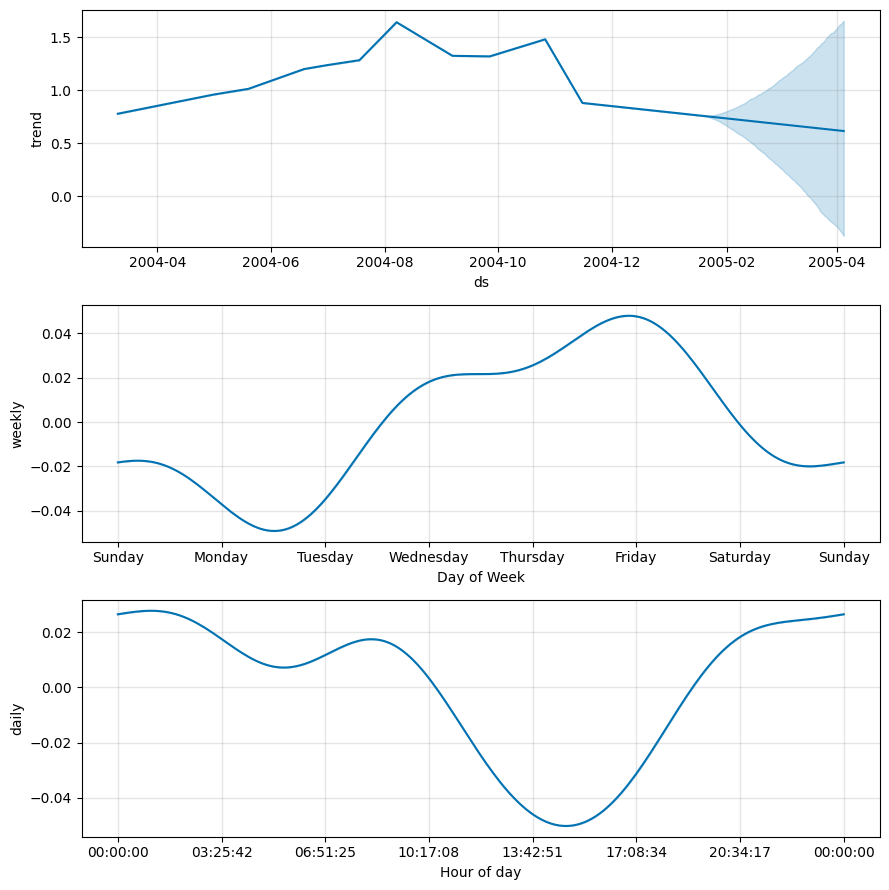

In [721]:
fig1=model.plot(forecast)
fig2=model.plot_components(forecast)

#### forecasting for AH

In [722]:
future=model.make_future_dataframe(periods=2500,freq='h')
forecast=model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(20)

ds      yhat  yhat_lower  yhat_upper
9965 2005-04-29 23:00:00  0.592370   -0.991530    2.126288
9966 2005-04-30 00:00:00  0.591479   -0.991396    2.112020
9967 2005-04-30 01:00:00  0.590365   -0.933461    2.121877
9968 2005-04-30 02:00:00  0.586613   -0.918781    2.142374
9969 2005-04-30 03:00:00  0.578992   -1.002199    2.169583
9970 2005-04-30 04:00:00  0.569488   -0.989303    2.152187
9971 2005-04-30 05:00:00  0.562347   -0.970119    2.100957
9972 2005-04-30 06:00:00  0.560723   -1.038542    2.124845
9973 2005-04-30 07:00:00  0.563802   -0.993955    2.163104
9974 2005-04-30 08:00:00  0.566944   -1.022907    2.136791
9975 2005-04-30 09:00:00  0.564816   -1.029873    2.125129
9976 2005-04-30 10:00:00  0.554962   -1.008690    2.074746
9977 2005-04-30 11:00:00  0.539109   -1.050213    2.131889
9978 2005-04-30 12:00:00  0.521615   -1.000751    2.027726
9979 2005-04-30 13:00:00  0.506826   -1.021586    2.041987
9980 2005-04-30 14:00:00  0.497517   -1.104784    2.078545
9981 2005-04-30 15:00:00  0.495010   -1.028156    2.061603
9982 2005-04-30 16:00:00  0.499824   -1.065105    2.114636
9983 2005-04-30 17:00:00  0.511525   -1.044317    2.094006
9984 2005-04-30 18:00:00  0.527928   -1.036921    2.165773

successfully training testing and forecasting of feature ansolute humidity(AH)

# SUCCESSFULLY COMPLETED MODEL TRAINING , TESTING & FORECASTING OF FEATURES :-
- RH (RELATIVE HUMIDITY IN %)
- AH (Absolute Humidity)
- T(Temperature in °C)
- PT08.S5(O3) hourly averaged sensor response (nominally O3 targeted)
- PT08.S4(NO2) hourly averaged sensor response (nominally NO2 targeted)
- CO(GT) True hourly averaged concentration CO in mg/m^3 (reference analyzer)
- PT08.S1(CO) hourly averaged sensor response (nominally CO targeted)
- C6H6(GT) True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
- NOx(GT) True hourly averaged NOx concentration in ppb (reference analyzer)
- NO2(GT) rue hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
- <span style="color:red">[DROPPED]-->NMHC(GT) True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)</span>

# MOVING TOWARDS AQI DATA:-
- training
- testing
- forecasting


library importing 

In [723]:
# Import libraries
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np


setting aqi in variable y and constituents in  x

In [724]:
air_quality_data_qith_aqi=pd.read_csv("./AirQualityUCI_with_AQI.csv")

In [725]:
air_quality_data_qith_aqi.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  Unnamed: 15  Unnamed: 16    AQI  
0  13.6  48.9  0.7578          NaN          NaN  319.0  
1  13.3  47.7  0.7255          NaN          NaN  288.0  
2  11.9  54.0  0.7502          NaN          NaN  280.0  
3  11.0  60.0  0.7867          NaN          NaN  284.0  
4  11.2  59.6  0.7888          NaN          NaN  229.0

In [726]:
#  Separate features (X) and target (y)
X = air_quality_data[["CO(GT)", "NO2(GT)","NOx(GT)","C6H6(GT)"]]   # input features only those features on which aqi is calculated
Y = air_quality_data_qith_aqi[["AQI"]]

In [727]:
print(X)
print(Y)

      CO(GT)  NO2(GT)  NOx(GT)  C6H6(GT)
0        2.6    113.0    166.0      11.9
1        2.0     92.0    103.0       9.4
2        2.2    114.0    131.0       9.0
3        2.2    122.0    172.0       9.2
4        1.6    116.0    131.0       6.5
...      ...      ...      ...       ...
9352     3.1    190.0    472.0      13.5
9353     2.4    179.0    353.0      11.4
9354     2.4    175.0    293.0      12.4
9355     2.1    156.0    235.0       9.5
9356     2.2    168.0    265.0      11.9

[9357 rows x 4 columns]
        AQI
0     319.0
1     288.0
2     280.0
3     284.0
4     229.0
...     ...
9466    NaN
9467    NaN
9468    NaN
9469    NaN
9470    NaN

[9471 rows x 1 columns]


In [728]:
X.shape


(9357, 4)

In [729]:
Y.shape

(9471, 1)

as we can clearly see in AQI table some rows have NaN values and also mismatch in number of rows of column X & column Y  so we have to remove it to make data clean and consistence 

In [730]:
Y.loc[[9356]]

AQI
9356  319.0

In [731]:
Y.loc[[9357]]

AQI
9357  NaN

from above two cell we clearly see NaN values are starting from row no 9357 so keeping rows above from it and removing rows below from it including 9357

In [732]:
Y=Y.head(9357)

In [733]:
Y.tail()

AQI
9352  401.0
9353  361.0
9354  324.0
9355  290.0
9356  319.0

now we have successfully remove NaN values from aqi table and make equal no. of rows in X and Y

In [734]:
X.shape

(9357, 4)

In [735]:
Y.shape

(9357, 1)

In [736]:
X.isnull().sum()

CO(GT)      0
NO2(GT)     0
NOx(GT)     0
C6H6(GT)    0
dtype: int64

In [737]:
Y.isnull().sum()

AQI    31
dtype: int64

since we can see Y has 31 NaN values so cleaning it as well

**HANDLING MISSING VALUES IN AQI TABLE**
- replacing NaN with mean of table 

In [738]:
Y=Y.fillna(Y.mean(numeric_only=True))

In [739]:
Y.isnull().sum()

AQI    0
dtype: int64

missing values handled successfully

In [740]:
X.head()

CO(GT)  NO2(GT)  NOx(GT)  C6H6(GT)
0     2.6    113.0    166.0      11.9
1     2.0     92.0    103.0       9.4
2     2.2    114.0    131.0       9.0
3     2.2    122.0    172.0       9.2
4     1.6    116.0    131.0       6.5

In [741]:
Y.head()

AQI
0  319.0
1  288.0
2  280.0
3  284.0
4  229.0

In [742]:
from sklearn.model_selection import train_test_split

# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape, y_train.shape)
print("Testing set size:", X_test.shape, y_test.shape)


Training set size: (7485, 4) (7485, 1)
Testing set size: (1872, 4) (1872, 1)


In [743]:
model = XGBRegressor(
    n_estimators=100,   # number of trees
    learning_rate=0.1,  # how fast the model learns
    max_depth=5,        # depth of each tree
    random_state=42
)

In [744]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [745]:
y_pred = model.predict(X_test)

In [746]:
print(y_pred)

[225.05353 198.30719 344.9481  ... 203.62344 371.32288 287.6987 ]


**PERFORMANCE METRICS**

In [747]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Model Performance:")
print("MAE :", mae)
print("RMSE:", rmse)
print("R²  :", r2)

Model Performance:
MAE : 2.1015822887420654
RMSE: 5.161674466757978
R²  : 0.9974562525749207


- MAE = 2.10

This means: on average, your AQI predictions are off by only about 2 AQI units.

*if real AQI = 120, the model often says ~118 or ~122. That’s very close!*

- RMSE = 5.16

RMSE penalizes big mistakes more heavily.

Here, even  “worst” errors are still within about 5 AQI units on average.

Example: If real AQI = 150, model might say 155 or 145 occasionally. Still very good.

- R² = 0.997

R²  report card grade (0 = terrible, 1 = perfect).

0.997 means  model explains 99.7% of the variation in AQI values!

In plain words →  model has almost perfectly captured the relationship between pollutants and AQI.

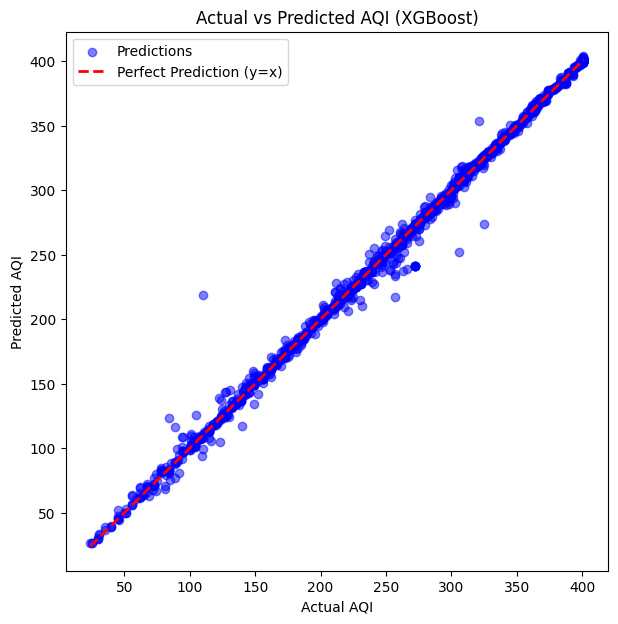

In [748]:
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue", label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', lw=2, label="Perfect Prediction (y=x)")
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI (XGBoost)")
plt.legend()
plt.show()


**INTERPRETATION**<BR>
In that scatter plot:

x-axis = Actual AQI values (from y_test)

y-axis = Predicted AQI values (from y_pred)

So, each blue dot = one test sample.
 Its position shows:

How much the true AQI was (x).

How much the model predicted (y).

Now, the red dashed line (y=x) is a reference line:

If a dot falls exactly on the red line, then predicted = actual (perfect prediction).

If a dot is above the line, model predicted too high.

If a dot is below the line, model predicted too low.

So you recognize actual vs predicted by reading the axes:

Horizontal position = actual.

Vertical position = predicted.

***RESIDUAL PLOT***

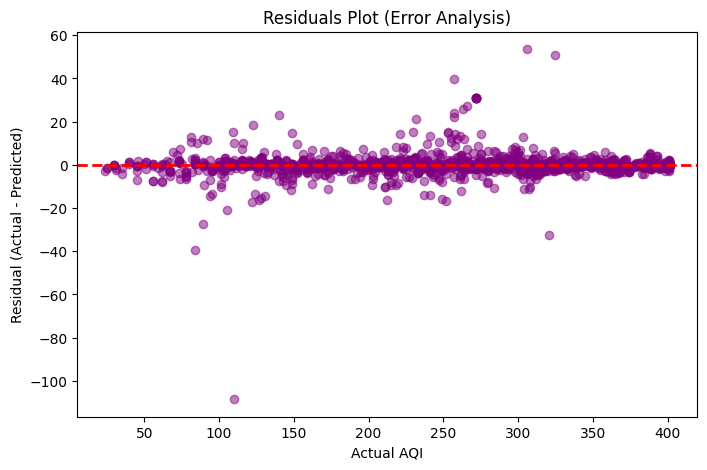

In [749]:

# Ensure y_test is a Series (not DataFrame)
y_test_series = y_test.squeeze()

# Residuals = errors
residuals = y_test_series - y_pred

plt.figure(figsize=(8,5))
plt.scatter(y_test_series, residuals, alpha=0.5, color="purple")
plt.axhline(0, color="red", linestyle="--", lw=2)
plt.xlabel("Actual AQI")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residuals Plot (Error Analysis)")
plt.show()


### SAVING MODEL

**xgboost model saving**

In [750]:
import joblib

# --- Step 1: Save the trained model ---
joblib.dump(model, "xgb_aqi_model.pkl")
print("Model saved as xgb_aqi_model.pkl")

# --- Step 2: Load the model later for predictions ---
loaded_model = joblib.load("xgb_aqi_model.pkl")
y_new_pred = loaded_model.predict(X_test)  # you can use any new data


Model saved as xgb_aqi_model.pkl


# **DEMONSTARTION OF MODEL THAT IS HOW MODEL WILL WORK ?**

**Step 1: Load Prophet model and forecast CO(GT) , NO2(GT), NOx(GT), C6H6 USING PROPHET PREDICTION**

In [791]:
import pandas as pd
import joblib  # safer than pickle for Prophet models

# --- 1. Load all saved Prophet models ---
prophet_CO = joblib.load("./prophet_CO_model.pkl")
prophet_NO2 = joblib.load("./prophet_NO2(GT)_model.pkl")
prophet_NOx = joblib.load("./prophet_NOx(GT)_model.pkl")
prophet_C6H6 = joblib.load("./prophet_C6H6_model.pkl")

# 2. Generate future 7 days (hourly)
# ---------------------------
future_hours = 7 * 24  # 7 days * 24 hours
future_CO = prophet_CO.make_future_dataframe(periods=future_hours, freq='h')
future_NO2 = prophet_NO2.make_future_dataframe(periods=future_hours, freq='h')
future_NOx = prophet_NOx.make_future_dataframe(periods=future_hours, freq='h')
future_C6H6 = prophet_C6H6.make_future_dataframe(periods=future_hours, freq='h')

# --- 4. Forecast using Prophet models ---
forecast_CO = prophet_CO.predict(future_CO)
forecast_NO2 = prophet_NO2.predict(future_NO2)
forecast_NOx = prophet_NOx.predict(future_NOx)
forecast_C6H6 = prophet_C6H6.predict(future_C6H6)

# --- 5. Extract only predicted values ---
pred_CO = forecast_CO[['ds', 'yhat']].rename(columns={'yhat': 'CO(GT)'})
pred_NO2 = forecast_NO2[['ds', 'yhat']].rename(columns={'yhat': 'NO2(GT)'})
pred_NOx = forecast_NOx[['ds', 'yhat']].rename(columns={'yhat': 'NOx(GT)'})
pred_C6H6 = forecast_C6H6[['ds', 'yhat']].rename(columns={'yhat': 'C6H6(GT)'})

# --- 6. Merge all predicted constituents on date ---
predicted_features = pred_CO.merge(pred_NO2, on='ds') \
                            .merge(pred_NOx, on='ds') \
                            .merge(pred_C6H6, on='ds')

print(predicted_features)


                      ds    CO(GT)     NO2(GT)     NOx(GT)   C6H6(GT)
0    2004-03-10 18:00:00  3.660961  136.132471  254.126174  17.894992
1    2004-03-10 19:00:00  3.797218  138.261847  265.491304  18.409818
2    2004-03-10 20:00:00  3.547792  133.925450  249.439295  16.561240
3    2004-03-10 21:00:00  3.016758  123.427841  206.661451  13.225299
4    2004-03-10 22:00:00  2.478723  110.824490  156.478039  10.257812
...                  ...       ...         ...         ...        ...
7648 2005-01-23 10:00:00  2.412988  135.837536  398.453679   7.364352
7649 2005-01-23 11:00:00  2.225468  132.561557  367.017168   5.810935
7650 2005-01-23 12:00:00  2.067738  127.129383  335.912763   4.972808
7651 2005-01-23 13:00:00  1.976404  123.754790  320.544371   4.733350
7652 2005-01-23 14:00:00  1.955781  124.020753  321.540844   4.739393

[7653 rows x 5 columns]


NOW FRAMING DATAFRAME FOR XGBOOST INPUT

In [792]:
# Merge all predicted pollutants on 'ds' (date)
pred_df = pred_CO.merge(pred_NO2, on='ds') \
                 .merge(pred_NOx, on='ds') \
                 .merge(pred_C6H6, on='ds')

# Rename columns for clarity
pred_df.columns = ['ds', 'CO(GT)', 'NO2(GT)', 'NOx(GT)', 'C6H6(GT)']
#dropped ds as xgboost not trained on it
X_pred = pred_df[['ds','CO(GT)', 'NO2(GT)', 'NOx(GT)', 'C6H6(GT)']]
print(X_pred.head())

                   ds    CO(GT)     NO2(GT)     NOx(GT)   C6H6(GT)
0 2004-03-10 18:00:00  3.660961  136.132471  254.126174  17.894992
1 2004-03-10 19:00:00  3.797218  138.261847  265.491304  18.409818
2 2004-03-10 20:00:00  3.547792  133.925450  249.439295  16.561240
3 2004-03-10 21:00:00  3.016758  123.427841  206.661451  13.225299
4 2004-03-10 22:00:00  2.478723  110.824490  156.478039  10.257812


loading xgboost model pkl file

In [793]:
from joblib import load  # import load function

# Load the saved XGBoost model
xgb_model = load("../AIR_QUALITY_INDEX_PROJECT/xgb_aqi_model.pkl")


**PREDICTION OF AQI FOR  CONSTITUENTS WHICH ARE PREDICTED BY PROPHET**

In [795]:
import pandas as pd
from joblib import load


# For clarity, create a dataframe to show both constituents and AQI
pred_df = X_pred.copy()

# --- Predict AQI using XGBoost ---
y_pred_future = xgb_model.predict(X_pred[['CO(GT)', 'NO2(GT)', 'NOx(GT)', 'C6H6(GT)']])

# Add predictions to dataframe
pred_df['Predicted_AQI'] = y_pred_future

# Display date, constituent values, and predicted AQI
print(pred_df[['ds', 'CO(GT)', 'NO2(GT)', 'NOx(GT)', 'C6H6(GT)', 'Predicted_AQI']])


                      ds    CO(GT)     NO2(GT)     NOx(GT)   C6H6(GT)  \
0    2004-03-10 18:00:00  3.660961  136.132471  254.126174  17.894992   
1    2004-03-10 19:00:00  3.797218  138.261847  265.491304  18.409818   
2    2004-03-10 20:00:00  3.547792  133.925450  249.439295  16.561240   
3    2004-03-10 21:00:00  3.016758  123.427841  206.661451  13.225299   
4    2004-03-10 22:00:00  2.478723  110.824490  156.478039  10.257812   
...                  ...       ...         ...         ...        ...   
7648 2005-01-23 10:00:00  2.412988  135.837536  398.453679   7.364352   
7649 2005-01-23 11:00:00  2.225468  132.561557  367.017168   5.810935   
7650 2005-01-23 12:00:00  2.067738  127.129383  335.912763   4.972808   
7651 2005-01-23 13:00:00  1.976404  123.754790  320.544371   4.733350   
7652 2005-01-23 14:00:00  1.955781  124.020753  321.540844   4.739393   

      Predicted_AQI  
0        378.054047  
1        385.365021  
2        365.316803  
3        330.198669  
4        300.

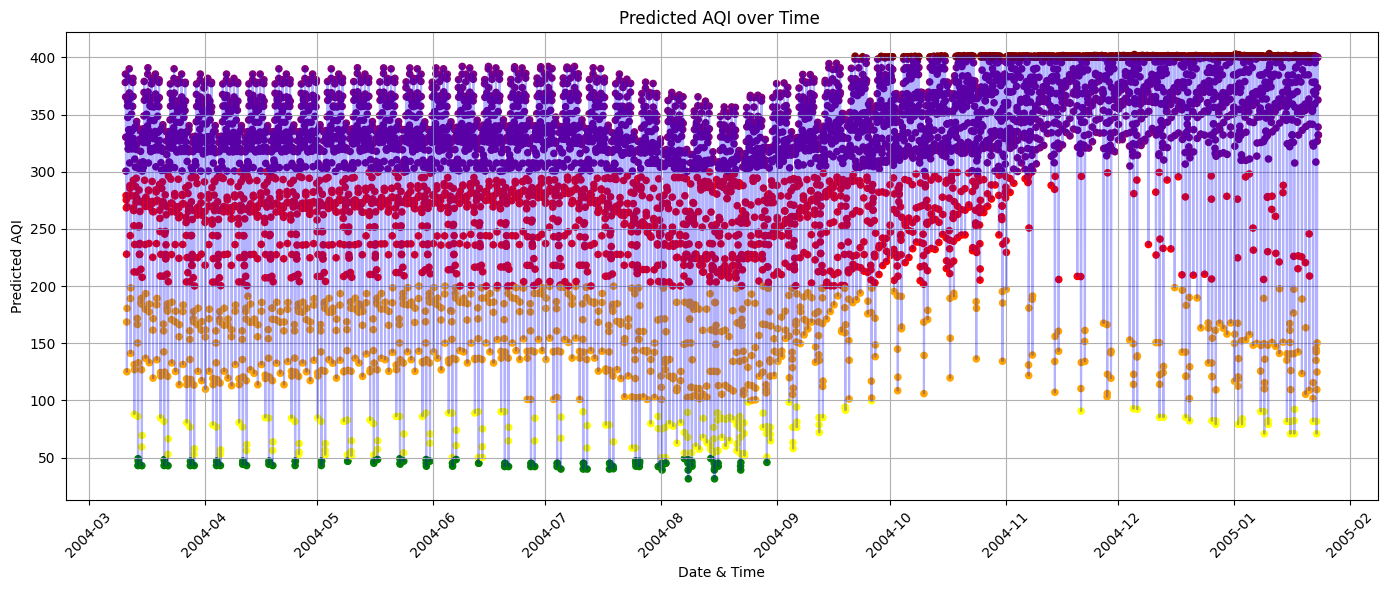

In [797]:
import matplotlib.pyplot as plt

# Define AQI categories and colors
def aqi_category_color(aqi):
    if aqi <= 50:
        return 'green'        # Good
    elif aqi <= 100:
        return 'yellow'       # Satisfactory
    elif aqi <= 200:
        return 'orange'       # Moderate
    elif aqi <= 300:
        return 'red'          # Poor
    elif aqi <= 400:
        return 'purple'       # Very Poor
    else:
        return 'maroon'       # Severe

# Apply color based on AQI
pred_df['Color'] = pred_df['Predicted_AQI'].apply(aqi_category_color)

# Plot AQI over time
plt.figure(figsize=(14,6))
plt.scatter(pred_df['ds'], pred_df['Predicted_AQI'], c=pred_df['Color'], s=20)
plt.plot(pred_df['ds'], pred_df['Predicted_AQI'], color='blue', alpha=0.3)
plt.title("Predicted AQI over Time ")
plt.xlabel("Date & Time")
plt.ylabel("Predicted AQI")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


**--------------------------------------AT THIS STEP MODEL SUCCESSFULLY TRAINED TESTED AND DEMONSTRATED------------------------------------------**